# Home Credit Default Risk

#### CS200 Data Mining Final Project - Kartik Dave & Shweta Rajagopal

## Headings Index

**1.Random Model Implementation**


**2.With All Features**


**3.Feature Selection before any Pre-Processing**


**4.Feature Selection after other Pre-Processing**


**5.Use of Iterative IterativeImputer to fill the missing values**


**6.Oversampling using SMOTE**


**7.Oversampling using ADASYSN**

### **8.Taking the best of all world**


**9.Hyperparameter tuning using grid search (for logistic regression)**


**10.Using Stacking (LogisticRegression, BaggingClassifier, AdaBoostClassifier & RandomForestClassifier)**


**11.Hyperparameter tuning using grid search (for Bagging Classifier)**




In [1]:
import pandas as pd

from feature_selector import FeatureSelector

**Importing Data**

In [2]:
# The application data with a classification class 'Target' which will be used for modeling 
application_train = pd.read_csv('home-credit-default-risk/application_train.csv')

# The application data which will be later used as input to the model
application_test = pd.read_csv('home-credit-default-risk/application_test.csv')

**Analysis on the features - Data Dimensionality**

In [3]:
print("application_train:",application_train.shape)

application_train: (307511, 122)


In [4]:
print("The total of 122 features are present in the raw data, the different features are:")

print("application_train:",application_train.columns.values)

The total of 122 features are present in the raw data, the different features are:
application_train: ['SK_ID_CURR' 'TARGET' 'NAME_CONTRACT_TYPE' 'CODE_GENDER' 'FLAG_OWN_CAR'
 'FLAG_OWN_REALTY' 'CNT_CHILDREN' 'AMT_INCOME_TOTAL' 'AMT_CREDIT'
 'AMT_ANNUITY' 'AMT_GOODS_PRICE' 'NAME_TYPE_SUITE' 'NAME_INCOME_TYPE'
 'NAME_EDUCATION_TYPE' 'NAME_FAMILY_STATUS' 'NAME_HOUSING_TYPE'
 'REGION_POPULATION_RELATIVE' 'DAYS_BIRTH' 'DAYS_EMPLOYED'
 'DAYS_REGISTRATION' 'DAYS_ID_PUBLISH' 'OWN_CAR_AGE' 'FLAG_MOBIL'
 'FLAG_EMP_PHONE' 'FLAG_WORK_PHONE' 'FLAG_CONT_MOBILE' 'FLAG_PHONE'
 'FLAG_EMAIL' 'OCCUPATION_TYPE' 'CNT_FAM_MEMBERS' 'REGION_RATING_CLIENT'
 'REGION_RATING_CLIENT_W_CITY' 'WEEKDAY_APPR_PROCESS_START'
 'HOUR_APPR_PROCESS_START' 'REG_REGION_NOT_LIVE_REGION'
 'REG_REGION_NOT_WORK_REGION' 'LIVE_REGION_NOT_WORK_REGION'
 'REG_CITY_NOT_LIVE_CITY' 'REG_CITY_NOT_WORK_CITY'
 'LIVE_CITY_NOT_WORK_CITY' 'ORGANIZATION_TYPE' 'EXT_SOURCE_1'
 'EXT_SOURCE_2' 'EXT_SOURCE_3' 'APARTMENTS_AVG' 'BASEMENTAREA_AVG'
 'Y

**Analysis on Data Sparsity**

In [5]:
print("The count of features having missing values:")

application_train.columns[application_train.isnull().any()].size

The count of features having missing values:


67

In [6]:
print("The top 5 missing values percentage of features:")

missing_per_df = (application_train.isnull() | application_train.isna()).sum() * 100 / application_train.index.size

missing_per_df.sort_values(ascending = False).head(10)

The top 5 missing values percentage of features:


COMMONAREA_MEDI             69.872297
COMMONAREA_AVG              69.872297
COMMONAREA_MODE             69.872297
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAPARTMENTS_MEDI    69.432963
NONLIVINGAPARTMENTS_AVG     69.432963
FONDKAPREMONT_MODE          68.386172
LIVINGAPARTMENTS_MEDI       68.354953
LIVINGAPARTMENTS_MODE       68.354953
LIVINGAPARTMENTS_AVG        68.354953
dtype: float64

**Features Understading and Visualization**

In [7]:
import plotly.graph_objects as go

In [8]:
def draw_pie(df,column):
    fig = go.Figure(data=[go.Pie(labels=df[column].value_counts().index, 
                             values=df[column].value_counts().values)])
    fig.show()

In [9]:
def draw_bar(df,column):
    fig = go.Figure(data=[go.Bar(x=df[column].value_counts().index, 
                             y=df[column].value_counts().values)])
    fig.show()

In [10]:
def calculate_percentage(data,feature):
    percentage = data[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    percentage.sort_values(by='TARGET', ascending=False, inplace=True)
    return percentage

##### Exploring target
application_train/application_test contains a column named TARGET to indicate the loan status <br>
0: repaid<br>
1: not repaid<br>

In [11]:
application_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [12]:
draw_pie(application_train,'TARGET')

**Finding -> The imbalance in the data can be clearly seen from the above graph**

**Exporing others**

In [13]:
application_train['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

In [14]:
draw_pie(application_train,'NAME_CONTRACT_TYPE')

**Finding -> Cash loans are taken most of the times**

**Percent of loans which were not repayed**

In [15]:
not_repaid = application_train[application_train['TARGET']==1]
draw_pie(not_repaid,'NAME_CONTRACT_TYPE')

**Finding -> In 9.52% of revolving loans, 6.46% was not repaid. Revolving loans are not repaid as mucha compared to cash loans**

**Exploring Gender**

In [16]:
application_train['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [17]:
draw_pie(application_train,'CODE_GENDER')

**Finding -> Females take most of the loans**

**Percent of each loans were not repayed for the gender**

In [18]:
draw_pie(not_repaid,'CODE_GENDER')

**Findings -> 42.9% in 34.2% males don't repay their loan. Females pay loans better**

**Exploring FLAG_OWN_CAR**

In [19]:
draw_pie(application_train,'FLAG_OWN_CAR')

**Percent of each loans were not repayed for FLAG_OWN_CAR**

In [20]:
draw_pie(not_repaid,'FLAG_OWN_CAR')

**Finding -> People with car repay less**

**Exploring FLAG_OWN_REALTY**

In [21]:
draw_pie(application_train,'FLAG_OWN_REALTY')

**Percent of each loans were not repayed for FLAG_OWN_REALTY**

In [22]:
draw_pie(not_repaid,'FLAG_OWN_REALTY')

**Finding -> Seems to be the same**

**Exploring CNT_CHILDREN**

In [23]:
draw_bar(application_train,'CNT_CHILDREN')

In [24]:
calculate_percentage(application_train,'CNT_CHILDREN')

CNT_CHILDREN    TARGET
9              9  1.000000
11            11  1.000000
6              6  0.285714
4              4  0.128205
3              3  0.096314
1              1  0.089236
2              2  0.087218
5              5  0.083333
0              0  0.077118
7              7  0.000000
8              8  0.000000
10            10  0.000000
12            12  0.000000
13            14  0.000000
14            19  0.000000

**Finding -> People with 9, 11 children don't pay their loans at all**

**Exploring NAME_EDUCATION_TYPE**

In [25]:
draw_bar(application_train,'NAME_EDUCATION_TYPE')

**Finding -> People with Secondary / secondary special education take loans largely**

In [26]:
calculate_percentage(application_train,'NAME_EDUCATION_TYPE')

NAME_EDUCATION_TYPE    TARGET
3                Lower secondary  0.109277
4  Secondary / secondary special  0.089399
2              Incomplete higher  0.084850
1               Higher education  0.053551
0                Academic degree  0.018293

**Lower secondary, Secondary / secondary special largely don't pay the loan back**

**Exploring NAME_INCOME_TYPE**

In [27]:
draw_bar(application_train,'NAME_INCOME_TYPE')

In [28]:
calculate_percentage(application_train,'NAME_INCOME_TYPE')

NAME_INCOME_TYPE    TARGET
2       Maternity leave  0.400000
6            Unemployed  0.363636
7               Working  0.095885
1  Commercial associate  0.074843
4         State servant  0.057550
3             Pensioner  0.053864
0           Businessman  0.000000
5               Student  0.000000

**Exploring NAME_FAMILY_STATUS**

In [29]:
draw_bar(application_train,'NAME_FAMILY_STATUS')
calculate_percentage(application_train,'NAME_FAMILY_STATUS')

NAME_FAMILY_STATUS    TARGET
0        Civil marriage  0.099446
3  Single / not married  0.098077
2             Separated  0.081942
1               Married  0.075599
5                 Widow  0.058242
4               Unknown  0.000000

**Exploring Occupation**

In [30]:
draw_bar(application_train,'OCCUPATION_TYPE')
calculate_percentage(application_train,'OCCUPATION_TYPE')

OCCUPATION_TYPE    TARGET
9      Low-skill Laborers  0.171524
4                 Drivers  0.113261
17   Waiters/barmen staff  0.112760
16         Security staff  0.107424
8                Laborers  0.105788
2           Cooking staff  0.104440
14            Sales staff  0.096318
1          Cleaning staff  0.096067
13          Realty agents  0.078562
15            Secretaries  0.070498
11         Medicine staff  0.067002
12  Private service staff  0.065988
7                IT staff  0.064639
5                HR staff  0.063943
3              Core staff  0.063040
10               Managers  0.062140
6   High skill tech staff  0.061599
0             Accountants  0.048303

**Exploring Organization**


In [31]:
draw_bar(application_train,'ORGANIZATION_TYPE')
calculate_percentage(application_train,'ORGANIZATION_TYPE')

ORGANIZATION_TYPE    TARGET
54       Transport: type 3  0.157540
18       Industry: type 13  0.134328
25        Industry: type 8  0.125000
38              Restaurant  0.117062
7             Construction  0.116798
6                 Cleaning  0.111538
14        Industry: type 1  0.110683
20        Industry: type 3  0.106162
36                 Realtor  0.106061
1              Agriculture  0.104727
47           Trade: type 3  0.103379
42           Self-employed  0.101739
21        Industry: type 4  0.101482
40                Security  0.099784
51           Trade: type 7  0.094496
5   Business Entity Type 3  0.092996
55       Transport: type 4  0.092812
32                  Mobile  0.091483
45           Trade: type 1  0.089080
16       Industry: type 11  0.086538
4   Business Entity Type 2  0.085284
35                  Postal  0.084376
0              Advertising  0.081585
3   Business Entity Type 1  0.081384
24        Industry: type 7  0.080337
13                 Housing  0.079446
29          Legal Services  0.078689
53       Transport: type 2  0.078040
33                   Other  0.076425
44                 Telecom  0.076256
19        Industry: type 2  0.072052
23        Industry: type 6  0.071429
10               Emergency  0.071429
28            Kindergarten  0.070349
46           Trade: type 2  0.070000
11              Government  0.069781
22        Industry: type 5  0.068447
26        Industry: type 9  0.066805
9              Electricity  0.066316
43                Services  0.066032
30                Medicine  0.065845
15       Industry: type 10  0.064220
12                   Hotel  0.064182
49           Trade: type 5  0.061224
39                  School  0.059148
37                Religion  0.058824
27               Insurance  0.056951
8                  Culture  0.055409
57                     XNA  0.053996
2                     Bank  0.051855
31                Military  0.051253
34                  Police  0.049979
56              University  0.048983
41     Security Ministries  0.048632
50           Trade: type 6  0.045959
52       Transport: type 1  0.044776
17       Industry: type 12  0.037940
48           Trade: type 4  0.031250

**Finding -> people who work in Transport: type 3,Industry: type 13 largely don't repay loan**

**One of the findings is that the data is very imbalanced between the "TARGET" classifier**

**Dropping Duplicates**

In [32]:
print(application_train.shape)

train_no_dup = application_train.drop_duplicates(keep=False)
print(application_train.shape)

(307511, 122)
(307511, 122)


**Finding -> There is no duplicates present in the data**

## Sampling train/test

**We will apply Stratified ShuffleSplit cross-validator to split the data in train/test sets**

In [33]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=3, test_size=0.3, random_state=42)

for train_index, test_index in split.split(train_no_dup, train_no_dup['TARGET']):
    app_train_set = train_no_dup.loc[train_index]
    app_test_set = train_no_dup.loc[test_index]
    
app_train_set.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
222846      358118       0         Cash loans           F            N   
237484      375081       0         Cash loans           F            N   
174582      302317       0         Cash loans           F            Y   
82560       195748       0         Cash loans           F            Y   
247998      386963       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
222846               Y             0          652500.0   1107612.0   
237484               Y             0          157500.0    983299.5   
174582               Y             1           81000.0    327024.0   
82560                Y             0          373500.0   1408806.0   
247998               N             0          202500.0   1288350.0   

        AMT_ANNUITY             ...              FLAG_DOCUMENT_18  \
222846      45841.5             ...                             0   
237484      39127.5             ...                             0   
174582      21289.5             ...                             0   
82560       94657.5             ...                             0   
247998      37669.5             ...                             0   

       FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
222846                0                0                0   
237484                0                0                0   
174582                0                0                0   
82560                 0                0                0   
247998                0                0                0   

       AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
222846                        0.0                       0.0   
237484                        NaN                       NaN   
174582                        0.0                       0.0   
82560                         NaN                       NaN   
247998                        0.0                       0.0   

        AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
222846                         0.0                        0.0   
237484                         NaN                        NaN   
174582                         0.0                        0.0   
82560                          NaN                        NaN   
247998                         0.0                        0.0   

        AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
222846                        1.0                         2.0  
237484                        NaN                         NaN  
174582                        0.0                         1.0  
82560                         NaN                         NaN  
247998                        2.0                         1.0  

[5 rows x 122 columns]

In [34]:
app_train_set['TARGET'].value_counts()

0    197880
1     17377
Name: TARGET, dtype: int64

In [35]:
draw_pie(app_train_set,'TARGET')

**Finding -> It can be seen the split is done by maintaing the distribution**

In [36]:
app_train_X = app_train_set.drop(['TARGET'] , axis =1)

app_train_y = app_train_set['TARGET']

app_test_X = app_test_set.drop(['TARGET'] , axis =1)

app_test_y = app_test_set['TARGET']

print (app_train_X.shape, app_train_y.shape)
print (app_test_X.shape, app_test_y.shape)

(215257, 121) (215257,)
(92254, 121) (92254,)


In [37]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

In [38]:
def get_model_roc(train_y, pred_y):
    false_positive_rate, true_positive_rate, thresholds = roc_curve(train_y.tolist(), pred_y)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print("ROC score: ", roc_auc)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'blue', label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'m--')
    plt.xlim([0,1])
    plt.ylim([0,1.1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show();

In [39]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve

In [40]:
def get_model_prec_recall(train_y, pred_y):
    average_precision = average_precision_score(train_y.tolist(), pred_y)
    precision = precision_score(train_y.tolist(), pred_y)
    recall = recall_score(train_y.tolist(), pred_y)
    print('Precision score : {0:0.2f}'.format(precision))
    print('Recall score : {0:0.2f}'.format(recall))

    # Print classification report using sklearn
    print (classification_report(train_y.tolist(), pred_y, digits=4))

## Random Model Implementation

In [41]:
from sklearn.metrics import accuracy_score

import numpy as np

In [42]:
random_model_pred = []

for i in app_test_y:
    random_model_pred.append(np.random.choice(np.arange(0, 2), p=[0.5, 0.5]))
    
accuracy_score(app_test_y, random_model_pred)

0.4984065731567195

ROC score:  0.5024400766032174


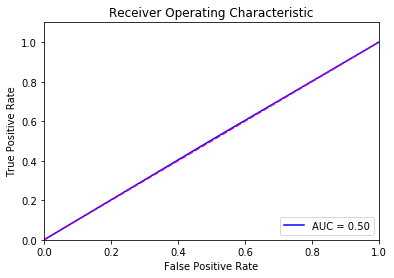

In [43]:
get_model_roc(app_test_y, random_model_pred)

In [44]:
get_model_prec_recall(app_test_y, random_model_pred)

Precision score : 0.08
Recall score : 0.51
              precision    recall  f1-score   support

           0     0.9200    0.4976    0.6459     84806
           1     0.0815    0.5073    0.1404      7448

    accuracy                         0.4984     92254
   macro avg     0.5007    0.5024    0.3931     92254
weighted avg     0.8523    0.4984    0.6051     92254



## With All Features

### Data Pre-Processing (Filling Missing Data and transforming categorical features into numeric)

In [45]:

# One-Hot encoding of categorical variables

app_train_X_all_features_encoded = pd.get_dummies(app_train_X)

print('Training Features shape: ', app_train_X_all_features_encoded.shape)


app_test_X_all_features_encoded = pd.get_dummies(app_test_X)

print('Training Features shape: ', app_test_X_all_features_encoded.shape)


Training Features shape:  (215257, 245)
Training Features shape:  (92254, 244)


In [46]:
# Align the training and testing data, keep only columns present in both dataframes
app_train_X_all_features_encoded, app_test_X_all_features_encoded = app_train_X_all_features_encoded.align(app_test_X_all_features_encoded, join = 'inner', axis = 1)

print('Training Features shape: ', app_train_X_all_features_encoded.shape)
print('Testing Features shape: ', app_test_X_all_features_encoded.shape)

Training Features shape:  (215257, 244)
Testing Features shape:  (92254, 244)


**finding -> most_frequest resulted in the best model performance by multiple runs**

In [47]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy = 'most_frequent')

imp.fit(app_train_X_all_features_encoded)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='most_frequent', verbose=0)

In [48]:
app_train_X_all_features_encoded_filled = imp.transform(app_train_X_all_features_encoded)

app_test_X_all_features_encoded_filled = imp.transform(app_test_X_all_features_encoded)

In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(app_train_X_all_features_encoded_filled)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [50]:
app_train_X_all_features_processed_scaled = scaler.transform(app_train_X_all_features_encoded_filled)

app_test_X_all_features_processed_scaled = scaler.transform(app_test_X_all_features_encoded_filled)

In [51]:
app_train_X_all_features_processed_scaled_df = pd.DataFrame(app_train_X_all_features_processed_scaled, columns = app_train_X_all_features_encoded.columns)

app_test_X_all_features_processed_scaled_df = pd.DataFrame(app_test_X_all_features_processed_scaled, columns = app_test_X_all_features_encoded.columns)

## For BaseLine and iterative improvements Undersampling is used

In [52]:
# For now not considered but will be used in analysis (Under sampling of Data)

application_train_all_features = app_train_X_all_features_processed_scaled_df 

application_train_all_features['TARGET'] = app_train_y

count_class_0, count_class_1 = application_train_all_features.TARGET.value_counts()

df_class_0 = application_train_all_features[application_train_all_features['TARGET'] == 0]
df_class_1 = application_train_all_features[application_train_all_features['TARGET'] == 1]

After sampling:
1.0    12250
0.0    12250
Name: TARGET, dtype: int64


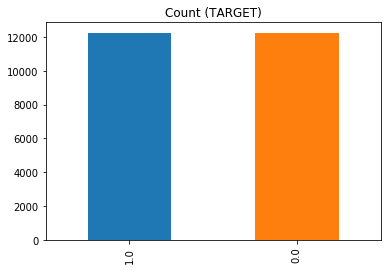

In [53]:
df_class_0_under = df_class_0.sample(count_class_1)
df_app_train_all_features_under_sampled = pd.concat([df_class_0_under, df_class_1], axis=0)

print('After sampling:')
print(df_app_train_all_features_under_sampled.TARGET.value_counts())

df_app_train_all_features_under_sampled.TARGET.value_counts().plot(kind='bar', title='Count (TARGET)');

In [54]:
app_train_X_all_features_processed_scaled_sampled_df = df_app_train_all_features_under_sampled.drop(['TARGET'] , axis =1)

app_train_y_all_features_sampled_df = df_app_train_all_features_under_sampled['TARGET']

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

classifiers=[]
model1 = LogisticRegression()
classifiers.append(model1)
model2 = GaussianNB()
classifiers.append(model2)
model3 = DecisionTreeClassifier()
classifiers.append(model3)
model4 = BaggingClassifier(DecisionTreeClassifier(random_state=42))
classifiers.append(model4)
model5 = AdaBoostClassifier(random_state=42)
classifiers.append(model5)
model6 = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)
classifiers.append(model6)
model8 = GradientBoostingClassifier(learning_rate=0.01,random_state=1)
classifiers.append(model8)

def classify(train_X, train_y, test_X, test_y):
    for clf in classifiers:
        clf.fit(train_X, train_y)
        y_pred= clf.predict(test_X)
        
        print(type(clf).__name__,":")
        print("Accuracy score:", accuracy_score(test_y, y_pred)) 
        get_model_roc(test_y, y_pred);
        get_model_prec_recall(test_y, y_pred);

c:\users\kartik\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression :
Accuracy score: 0.4927591215557049
ROC score:  0.5154735086534649


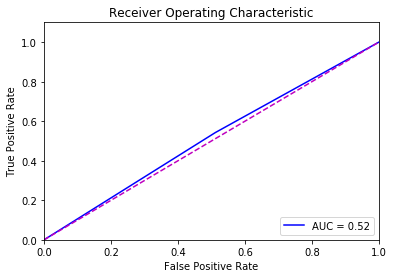

Precision score : 0.09
Recall score : 0.54
              precision    recall  f1-score   support

           0     0.9240    0.4884    0.6390     84806
           1     0.0852    0.5426    0.1473      7448

    accuracy                         0.4928     92254
   macro avg     0.5046    0.5155    0.3931     92254
weighted avg     0.8563    0.4928    0.5993     92254

GaussianNB :
Accuracy score: 0.24479155375376677
ROC score:  0.4965825410256499


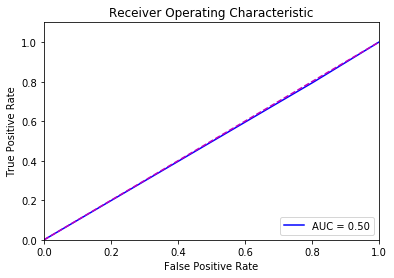

Precision score : 0.08
Recall score : 0.80
              precision    recall  f1-score   support

           0     0.9167    0.1963    0.3234     84806
           1     0.0801    0.7969    0.1456      7448

    accuracy                         0.2448     92254
   macro avg     0.4984    0.4966    0.2345     92254
weighted avg     0.8491    0.2448    0.3090     92254

DecisionTreeClassifier :
Accuracy score: 0.49688902378216665
ROC score:  0.4943275428042719


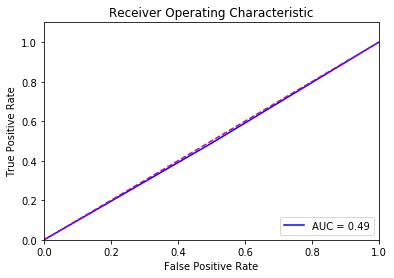

Precision score : 0.08
Recall score : 0.49
              precision    recall  f1-score   support

           0     0.9176    0.4974    0.6451     84806
           1     0.0791    0.4913    0.1362      7448

    accuracy                         0.4969     92254
   macro avg     0.4983    0.4943    0.3906     92254
weighted avg     0.8499    0.4969    0.6040     92254

BaggingClassifier :
Accuracy score: 0.6007435991935309
ROC score:  0.4982133038182324


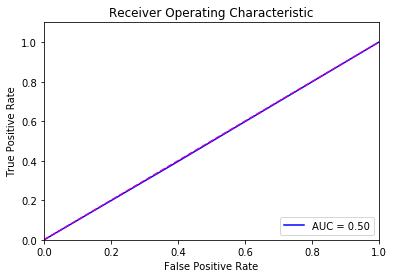

Precision score : 0.08
Recall score : 0.38
              precision    recall  f1-score   support

           0     0.9188    0.6205    0.7407     84806
           1     0.0800    0.3759    0.1320      7448

    accuracy                         0.6007     92254
   macro avg     0.4994    0.4982    0.4364     92254
weighted avg     0.8511    0.6007    0.6916     92254

AdaBoostClassifier :
Accuracy score: 0.5169965529949921
ROC score:  0.5099794645987115


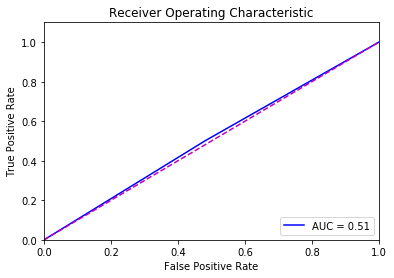

Precision score : 0.08
Recall score : 0.50
              precision    recall  f1-score   support

           0     0.9221    0.5183    0.6636     84806
           1     0.0838    0.5016    0.1436      7448

    accuracy                         0.5170     92254
   macro avg     0.5030    0.5100    0.4036     92254
weighted avg     0.8545    0.5170    0.6217     92254



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    7.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.6s


RandomForestClassifier :
Accuracy score: 0.526817265376027
ROC score:  0.4976237751377106


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.6s finished


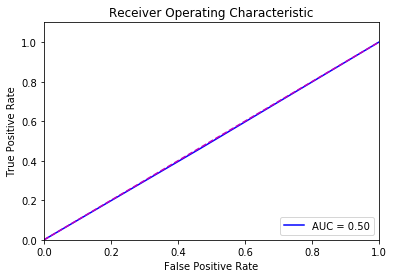

Precision score : 0.08
Recall score : 0.46
              precision    recall  f1-score   support

           0     0.9186    0.5324    0.6741     84806
           1     0.0800    0.4628    0.1364      7448

    accuracy                         0.5268     92254
   macro avg     0.4993    0.4976    0.4053     92254
weighted avg     0.8509    0.5268    0.6307     92254

GradientBoostingClassifier :
Accuracy score: 0.5469031153120731
ROC score:  0.47627717603934


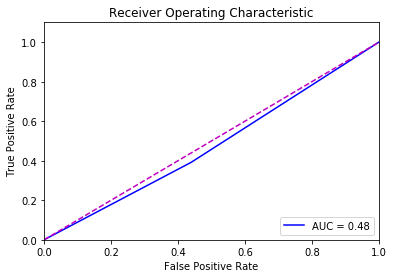

Precision score : 0.07
Recall score : 0.39
              precision    recall  f1-score   support

           0     0.9130    0.5605    0.6946     84806
           1     0.0727    0.3921    0.1226      7448

    accuracy                         0.5469     92254
   macro avg     0.4928    0.4763    0.4086     92254
weighted avg     0.8452    0.5469    0.6484     92254



In [56]:
classify(app_train_X_all_features_processed_scaled_sampled_df, app_train_y_all_features_sampled_df, app_test_X_all_features_processed_scaled_df, app_test_y)

## Feature Selection before any Pre-Processing

In [57]:
# For now not considered but will be used in analysis (Under sampling of Data)

application_train_feature_selection_before = app_train_X 

application_train_feature_selection_before['TARGET'] = app_train_y

count_class_0, count_class_1 = application_train_feature_selection_before.TARGET.value_counts()

df_class_0 = application_train_feature_selection_before[application_train_feature_selection_before['TARGET'] == 0]
df_class_1 = application_train_feature_selection_before[application_train_feature_selection_before['TARGET'] == 1]

After sampling:
1    17377
0    17377
Name: TARGET, dtype: int64


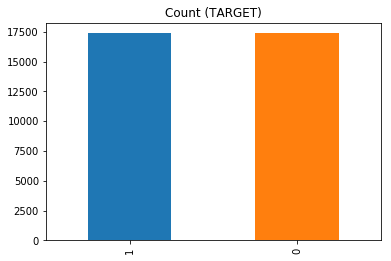

In [58]:
df_class_0_under = df_class_0.sample(count_class_1)
df_application_train_feature_selection_before_sampled = pd.concat([df_class_0_under, df_class_1], axis=0)

print('After sampling:')
print(df_application_train_feature_selection_before_sampled.TARGET.value_counts())

df_application_train_feature_selection_before_sampled.TARGET.value_counts().plot(kind='bar', title='Count (TARGET)');

In [59]:
app_train_X_feature_selection_before_sampled_df = df_application_train_feature_selection_before_sampled.drop(['TARGET'] , axis =1)

app_train_y_feature_selection_before_sampled_df = df_application_train_feature_selection_before_sampled['TARGET']

In [60]:
from feature_selector import FeatureSelector

fs=  FeatureSelector(data = app_train_X_feature_selection_before_sampled_df, labels = app_train_y_feature_selection_before_sampled_df)

fs.identify_all(selection_params = {'missing_threshold': 0.6, 'correlation_threshold': 0.98, 
                                    'task': 'classification', 'eval_metric': 'auc', 
                                     'cumulative_importance': 0.99})

23 features with greater than 0.60 missing values.

3 features with a single unique value.

23 features with a correlation magnitude greater than 0.98.

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[157]	valid_0's auc: 0.757356
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[172]	valid_0's auc: 0.754617
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[274]	valid_0's auc: 0.760615
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[158]	valid_0's auc: 0.750863
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[258]	valid_0's auc: 0.76769
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[161]	valid_0's auc: 0.753197
Training until validation scores don't improve

In [61]:
app_train_X_feature_selection_before_removed_all_df = fs.remove(methods = 'all', keep_one_hot = False)

['missing', 'single_unique', 'collinear', 'zero_importance', 'low_importance'] methods have been run

Removed 192 features including one-hot features.


In [62]:
app_train_X_feature_selection_before_removed_all_df.shape

(34754, 66)

In [63]:
# One-Hot encoding of categorical variables

app_train_X_feature_selection_before_removed_all_encoded = pd.get_dummies(app_train_X_feature_selection_before_removed_all_df)

print('Training Features shape: ', app_train_X_feature_selection_before_removed_all_encoded.shape)

Training Features shape:  (34754, 184)


In [64]:
app_test_X_feature_selection_before_removed_all_encoded = pd.get_dummies(app_test_X)

print('Training Features shape: ', app_test_X_feature_selection_before_removed_all_encoded.shape)

Training Features shape:  (92254, 244)


In [65]:
# Align the training and testing data, keep only columns present in both dataframes
app_train_X_feature_selection_before_removed_all_encoded, app_test_X_feature_selection_before_removed_all_encoded = app_train_X_feature_selection_before_removed_all_encoded.align(app_test_X_feature_selection_before_removed_all_encoded, join = 'inner', axis = 1)

print('Training Features shape: ', app_train_X_feature_selection_before_removed_all_encoded.shape)
print('Testing Features shape: ', app_test_X_feature_selection_before_removed_all_encoded.shape)

Training Features shape:  (34754, 184)
Testing Features shape:  (92254, 184)


In [66]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy = 'most_frequent')

imp.fit(app_train_X_feature_selection_before_removed_all_encoded)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='most_frequent', verbose=0)

In [67]:
app_train_X_feature_selection_before_removed_all_encoded_filled = imp.transform(app_train_X_feature_selection_before_removed_all_encoded)

app_test_X_feature_selection_before_removed_all_encoded_filled = imp.transform(app_test_X_feature_selection_before_removed_all_encoded)

In [68]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(app_train_X_feature_selection_before_removed_all_encoded_filled)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [69]:
app_train_X_feature_selection_before_removed_all_scaled = scaler.transform(app_train_X_feature_selection_before_removed_all_encoded_filled)

app_test_X_feature_selection_before_removed_all_scaled = scaler.transform(app_test_X_feature_selection_before_removed_all_encoded_filled)

In [70]:
print(app_train_X_feature_selection_before_removed_all_scaled.shape)

print(app_test_X_feature_selection_before_removed_all_scaled.shape)

(34754, 184)
(92254, 184)


In [71]:
app_train_X_feature_selection_before_removed_all_scaled_df = pd.DataFrame(app_train_X_feature_selection_before_removed_all_scaled, columns = app_train_X_feature_selection_before_removed_all_encoded.columns)

app_test_X_feature_selection_before_removed_all_scaled_df = pd.DataFrame(app_test_X_feature_selection_before_removed_all_scaled, columns = app_test_X_feature_selection_before_removed_all_encoded.columns)

c:\users\kartik\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression :
Accuracy score: 0.6688056886422269
ROC score:  0.6628495534117635


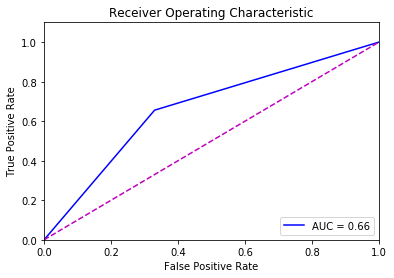

Precision score : 0.15
Recall score : 0.66
              precision    recall  f1-score   support

           0     0.9568    0.6700    0.7881     84806
           1     0.1486    0.6557    0.2422      7448

    accuracy                         0.6688     92254
   macro avg     0.5527    0.6628    0.5152     92254
weighted avg     0.8916    0.6688    0.7440     92254

GaussianNB :
Accuracy score: 0.27779825265029157
ROC score:  0.5513995368794331


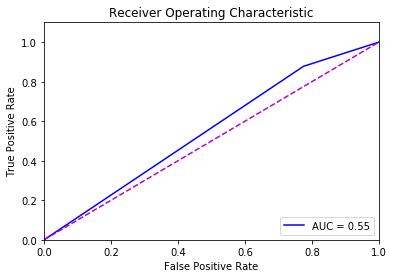

Precision score : 0.09
Recall score : 0.88
              precision    recall  f1-score   support

           0     0.9545    0.2251    0.3643     84806
           1     0.0905    0.8777    0.1640      7448

    accuracy                         0.2778     92254
   macro avg     0.5225    0.5514    0.2642     92254
weighted avg     0.8847    0.2778    0.3481     92254

DecisionTreeClassifier :
Accuracy score: 0.5816007977973855
ROC score:  0.581737799214853


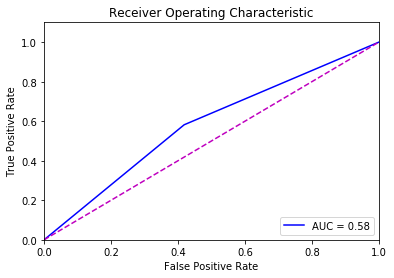

Precision score : 0.11
Recall score : 0.58
              precision    recall  f1-score   support

           0     0.9406    0.5816    0.7188     84806
           1     0.1088    0.5819    0.1834      7448

    accuracy                         0.5816     92254
   macro avg     0.5247    0.5817    0.4511     92254
weighted avg     0.8735    0.5816    0.6755     92254

BaggingClassifier :
Accuracy score: 0.6984737789147354
ROC score:  0.6411423457843114


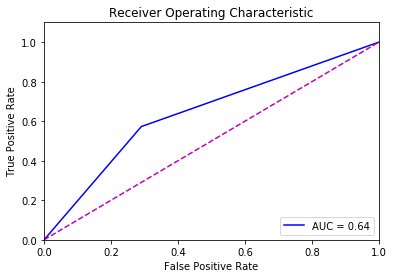

Precision score : 0.15
Recall score : 0.57
              precision    recall  f1-score   support

           0     0.9498    0.7095    0.8122     84806
           1     0.1476    0.5728    0.2347      7448

    accuracy                         0.6985     92254
   macro avg     0.5487    0.6411    0.5235     92254
weighted avg     0.8850    0.6985    0.7656     92254

AdaBoostClassifier :
Accuracy score: 0.673954516877317
ROC score:  0.6745293272877837


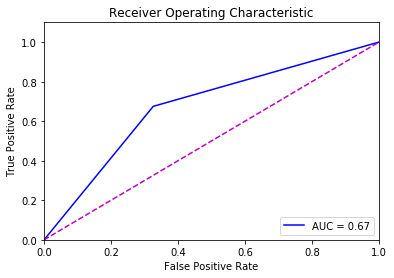

Precision score : 0.15
Recall score : 0.68
              precision    recall  f1-score   support

           0     0.9594    0.6738    0.7917     84806
           1     0.1538    0.6752    0.2506      7448

    accuracy                         0.6740     92254
   macro avg     0.5566    0.6745    0.5211     92254
weighted avg     0.8944    0.6740    0.7480     92254



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    9.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.8s finished


RandomForestClassifier :
Accuracy score: 0.6854445335703601
ROC score:  0.6684091511394946


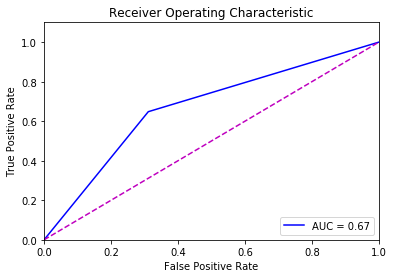

Precision score : 0.15
Recall score : 0.65
              precision    recall  f1-score   support

           0     0.9571    0.6887    0.8010     84806
           1     0.1546    0.6481    0.2496      7448

    accuracy                         0.6854     92254
   macro avg     0.5558    0.6684    0.5253     92254
weighted avg     0.8923    0.6854    0.7565     92254

GradientBoostingClassifier :
Accuracy score: 0.6344548745853839
ROC score:  0.6574540124344707


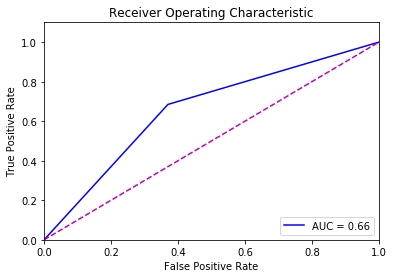

Precision score : 0.14
Recall score : 0.68
              precision    recall  f1-score   support

           0     0.9579    0.6300    0.7601     84806
           1     0.1398    0.6849    0.2323      7448

    accuracy                         0.6345     92254
   macro avg     0.5489    0.6575    0.4962     92254
weighted avg     0.8919    0.6345    0.7175     92254



In [72]:
classify(app_train_X_feature_selection_before_removed_all_scaled_df, app_train_y_feature_selection_before_sampled_df, app_test_X_feature_selection_before_removed_all_scaled_df, app_test_y)

## Feature Selection after other Pre-Processing

In [73]:
app_train_X_feature_selection_after_sampled_df = df_application_train_feature_selection_before_sampled.drop(['TARGET'] , axis =1)

app_train_y_feature_selection_after_sampled_df = df_application_train_feature_selection_before_sampled['TARGET']

In [74]:
fs = FeatureSelector(data = app_train_X_feature_selection_after_sampled_df, labels = app_train_y_feature_selection_after_sampled_df)

In [75]:
fs.identify_missing(missing_threshold=0.6)

23 features with greater than 0.60 missing values.



In [76]:
missing_features = fs.ops['missing']
missing_features

['OWN_CAR_AGE',
 'BASEMENTAREA_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'BASEMENTAREA_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'BASEMENTAREA_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'FONDKAPREMONT_MODE']

In [77]:
app_train_X_feature_selection_after_missing_removed = fs.remove(methods = ['missing'], keep_one_hot = False)

Data has not been one-hot encoded
Removed 23 features including one-hot features.


In [78]:
app_test_X_feature_selection_after_missing_removed = app_test_X.drop(missing_features, axis=1)

**Filling Missing Data and transforming categorical features into numeric**

In [79]:
# One-Hot encoding of categorical variables

app_train_X_feature_selection_after_encoded = pd.get_dummies(app_train_X_feature_selection_after_missing_removed)

print('Training Features shape: ', app_train_X_feature_selection_after_encoded.shape)

Training Features shape:  (34754, 216)


In [80]:
app_test_X_feature_selection_after_encoded = pd.get_dummies(app_test_X_feature_selection_after_missing_removed)

print('Training Features shape: ', app_test_X_feature_selection_after_encoded.shape)

Training Features shape:  (92254, 218)


In [81]:
# Align the training and testing data, keep only columns present in both dataframes
app_train_X_feature_selection_after_encoded, app_test_X_feature_selection_after_encoded = app_train_X_feature_selection_after_encoded.align(app_test_X_feature_selection_after_encoded, join = 'inner', axis = 1)

print('Training Features shape: ', app_train_X_feature_selection_after_encoded.shape)
print('Testing Features shape: ', app_test_X_feature_selection_after_encoded.shape)

Training Features shape:  (34754, 216)
Testing Features shape:  (92254, 216)


In [82]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy = 'most_frequent')

imp.fit(app_train_X_feature_selection_after_encoded)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='most_frequent', verbose=0)

In [83]:
app_train_X_feature_selection_after_encoded_filled = imp.transform(app_train_X_feature_selection_after_encoded)

app_test_X_feature_selection_after_encoded_filled = imp.transform(app_test_X_feature_selection_after_encoded)

In [84]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(app_train_X_feature_selection_after_encoded_filled)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [85]:
app_train_X_feature_selection_after_processed_scaled = scaler.transform(app_train_X_feature_selection_after_encoded_filled)

app_test_X_feature_selection_after_processed_scaled = scaler.transform(app_test_X_feature_selection_after_encoded_filled)

In [86]:
app_train_X_feature_selection_after_scaled_df = pd.DataFrame(app_train_X_feature_selection_after_processed_scaled, columns = app_train_X_feature_selection_after_encoded.columns)

app_test_X_feature_selection_after_scaled_df = pd.DataFrame(app_test_X_feature_selection_after_processed_scaled, columns = app_test_X_feature_selection_after_encoded.columns)

In [87]:
fs = FeatureSelector(data = app_train_X_feature_selection_after_scaled_df, labels = app_train_y_feature_selection_after_sampled_df)

fs.identify_all(selection_params = {'missing_threshold': 0.6, 'correlation_threshold': 0.98, 
                                    'task': 'classification', 'eval_metric': 'auc', 
                                     'cumulative_importance': 0.99})

0 features with greater than 0.60 missing values.

3 features with a single unique value.

19 features with a correlation magnitude greater than 0.98.

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[163]	valid_0's auc: 0.750961
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[347]	valid_0's auc: 0.751731
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[259]	valid_0's auc: 0.752395
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[145]	valid_0's auc: 0.762855
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[162]	valid_0's auc: 0.752771
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[204]	valid_0's auc: 0.742522
Training until validation scores don't improve

In [88]:
all_to_remove = fs.check_removal()

Total of 106 features identified for removal


In [89]:
app_train_X_feature_selection_after_complete_processed_df = fs.remove(methods = 'all', keep_one_hot=False)

['missing', 'single_unique', 'collinear', 'zero_importance', 'low_importance'] methods have been run

Removed 106 features including one-hot features.


In [90]:
app_train_X_feature_selection_after_complete_processed_df.shape

(34754, 110)

In [91]:
app_test_X_feature_selection_after_processed_df = app_test_X_feature_selection_after_scaled_df.drop(all_to_remove, axis=1)

c:\users\kartik\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression :
Accuracy score: 0.6691525570706961
ROC score:  0.6625483288540805


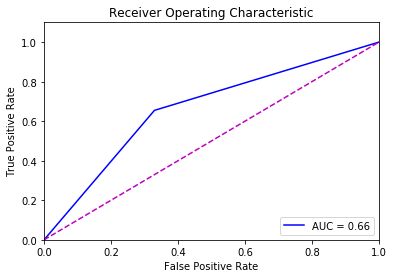

Precision score : 0.15
Recall score : 0.65
              precision    recall  f1-score   support

           0     0.9567    0.6704    0.7884     84806
           1     0.1485    0.6547    0.2421      7448

    accuracy                         0.6692     92254
   macro avg     0.5526    0.6625    0.5153     92254
weighted avg     0.8915    0.6692    0.7443     92254

GaussianNB :
Accuracy score: 0.5902616688707265
ROC score:  0.6108206008973334


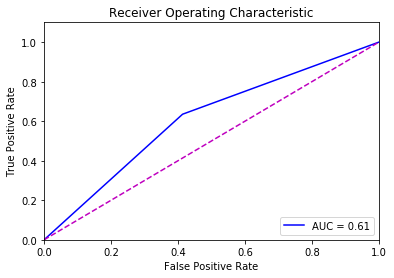

Precision score : 0.12
Recall score : 0.64
              precision    recall  f1-score   support

           0     0.9482    0.5863    0.7246     84806
           1     0.1188    0.6353    0.2002      7448

    accuracy                         0.5903     92254
   macro avg     0.5335    0.6108    0.4624     92254
weighted avg     0.8812    0.5903    0.6822     92254

DecisionTreeClassifier :
Accuracy score: 0.5827497994666898
ROC score:  0.5848122072661043


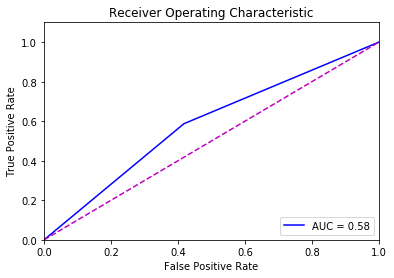

Precision score : 0.11
Recall score : 0.59
              precision    recall  f1-score   support

           0     0.9414    0.5824    0.7196     84806
           1     0.1099    0.5873    0.1852      7448

    accuracy                         0.5827     92254
   macro avg     0.5257    0.5848    0.4524     92254
weighted avg     0.8743    0.5827    0.6764     92254

BaggingClassifier :
Accuracy score: 0.6973030979686518
ROC score:  0.6330347689614102


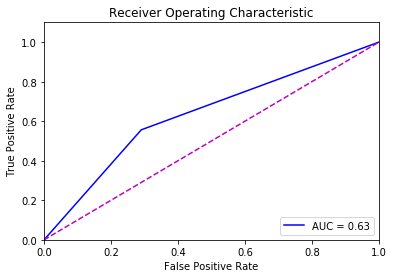

Precision score : 0.14
Recall score : 0.56
              precision    recall  f1-score   support

           0     0.9480    0.7097    0.8117     84806
           1     0.1441    0.5564    0.2289      7448

    accuracy                         0.6973     92254
   macro avg     0.5460    0.6330    0.5203     92254
weighted avg     0.8831    0.6973    0.7646     92254

AdaBoostClassifier :
Accuracy score: 0.673954516877317
ROC score:  0.6745293272877837


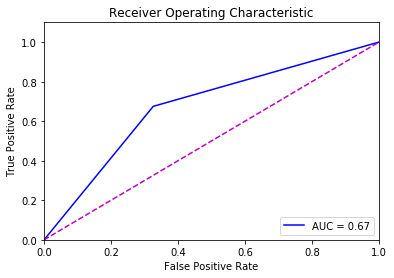

Precision score : 0.15
Recall score : 0.68
              precision    recall  f1-score   support

           0     0.9594    0.6738    0.7917     84806
           1     0.1538    0.6752    0.2506      7448

    accuracy                         0.6740     92254
   macro avg     0.5566    0.6745    0.5211     92254
weighted avg     0.8944    0.6740    0.7480     92254



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.3s finished


RandomForestClassifier :
Accuracy score: 0.683612634682507
ROC score:  0.6675964682949976


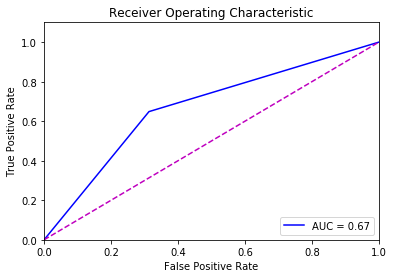

Precision score : 0.15
Recall score : 0.65
              precision    recall  f1-score   support

           0     0.9570    0.6867    0.7996     84806
           1     0.1538    0.6485    0.2487      7448

    accuracy                         0.6836     92254
   macro avg     0.5554    0.6676    0.5241     92254
weighted avg     0.8921    0.6836    0.7551     92254

GradientBoostingClassifier :
Accuracy score: 0.6344548745853839
ROC score:  0.6574540124344707


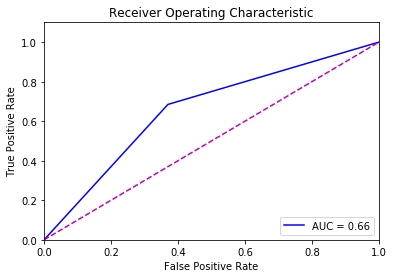

Precision score : 0.14
Recall score : 0.68
              precision    recall  f1-score   support

           0     0.9579    0.6300    0.7601     84806
           1     0.1398    0.6849    0.2323      7448

    accuracy                         0.6345     92254
   macro avg     0.5489    0.6575    0.4962     92254
weighted avg     0.8919    0.6345    0.7175     92254



In [92]:
classify(app_train_X_feature_selection_after_complete_processed_df, app_train_y_feature_selection_after_sampled_df, app_test_X_feature_selection_after_processed_df, app_test_y)

## Use of Iterative IterativeImputer to fill the missing values

In [93]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer(max_iter=10, random_state=42)

imp.fit(app_train_X_feature_selection_after_encoded)

IterativeImputer(add_indicator=False, estimator=None,
                 imputation_order='ascending', initial_strategy='mean',
                 max_iter=10, max_value=None, min_value=None,
                 missing_values=nan, n_nearest_features=None, random_state=42,
                 sample_posterior=False, tol=0.001, verbose=0)

In [94]:
app_train_X_feature_selection_after_encoded_filled = imp.transform(app_train_X_feature_selection_after_encoded)

app_test_X_feature_selection_after_encoded_filled = imp.transform(app_test_X_feature_selection_after_encoded)

In [95]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(app_train_X_feature_selection_after_encoded_filled)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [96]:
app_train_X_feature_selection_after_processed_scaled = scaler.transform(app_train_X_feature_selection_after_encoded_filled)

app_test_X_feature_selection_after_processed_scaled = scaler.transform(app_test_X_feature_selection_after_encoded_filled)

In [97]:
app_train_X_feature_selection_after_scaled_df = pd.DataFrame(app_train_X_feature_selection_after_processed_scaled, columns = app_train_X_feature_selection_after_encoded.columns)

app_test_X_feature_selection_after_scaled_df = pd.DataFrame(app_test_X_feature_selection_after_processed_scaled, columns = app_test_X_feature_selection_after_encoded.columns)

In [98]:
fs = FeatureSelector(data = app_train_X_feature_selection_after_scaled_df, labels = app_train_y_feature_selection_after_sampled_df)

fs.identify_all(selection_params = {'missing_threshold': 0.6, 'correlation_threshold': 0.98, 
                                    'task': 'classification', 'eval_metric': 'auc', 
                                     'cumulative_importance': 0.99})

0 features with greater than 0.60 missing values.

3 features with a single unique value.

19 features with a correlation magnitude greater than 0.98.

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[197]	valid_0's auc: 0.75312
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[185]	valid_0's auc: 0.761675
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[110]	valid_0's auc: 0.758599
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[163]	valid_0's auc: 0.763634
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[220]	valid_0's auc: 0.755427
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[183]	valid_0's auc: 0.747702
Training until validation scores don't improve 

In [99]:
all_to_remove = fs.check_removal()

Total of 119 features identified for removal


In [100]:
app_train_X_feature_selection_after_complete_processed_df = fs.remove(methods = 'all', keep_one_hot=False)

['missing', 'single_unique', 'collinear', 'zero_importance', 'low_importance'] methods have been run

Removed 119 features including one-hot features.


In [101]:
app_train_X_feature_selection_after_complete_processed_df.shape

(34754, 97)

In [102]:
app_test_X_feature_selection_after_processed_df = app_test_X_feature_selection_after_scaled_df.drop(all_to_remove, axis=1)

c:\users\kartik\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression :
Accuracy score: 0.6881002449758276
ROC score:  0.6820396494502534


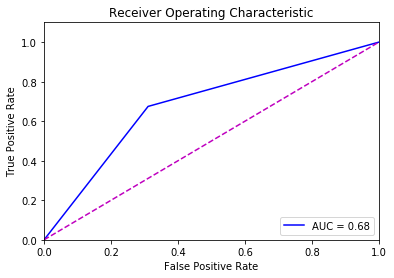

Precision score : 0.16
Recall score : 0.67
              precision    recall  f1-score   support

           0     0.9602    0.6893    0.8025     84806
           1     0.1602    0.6748    0.2589      7448

    accuracy                         0.6881     92254
   macro avg     0.5602    0.6820    0.5307     92254
weighted avg     0.8956    0.6881    0.7586     92254

GaussianNB :
Accuracy score: 0.641468120623496
ROC score:  0.6237919812966438


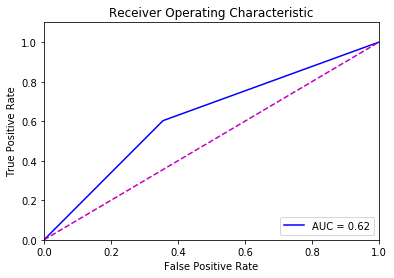

Precision score : 0.13
Recall score : 0.60
              precision    recall  f1-score   support

           0     0.9487    0.6449    0.7678     84806
           1     0.1297    0.6027    0.2135      7448

    accuracy                         0.6415     92254
   macro avg     0.5392    0.6238    0.4907     92254
weighted avg     0.8826    0.6415    0.7231     92254

DecisionTreeClassifier :
Accuracy score: 0.59079281115182
ROC score:  0.5874722811472437


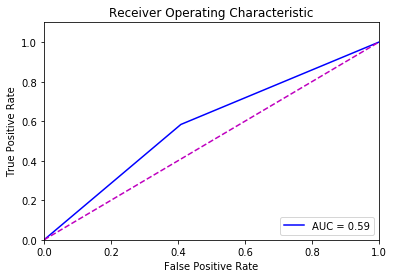

Precision score : 0.11
Recall score : 0.58
              precision    recall  f1-score   support

           0     0.9418    0.5914    0.7266     84806
           1     0.1115    0.5835    0.1872      7448

    accuracy                         0.5908     92254
   macro avg     0.5266    0.5875    0.4569     92254
weighted avg     0.8747    0.5908    0.6830     92254

BaggingClassifier :
Accuracy score: 0.7034925314891495
ROC score:  0.6424636704159792


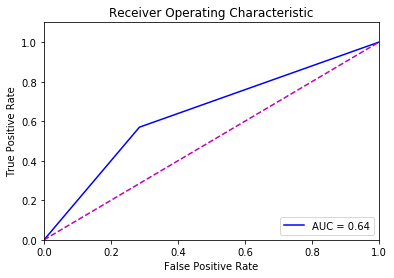

Precision score : 0.15
Recall score : 0.57
              precision    recall  f1-score   support

           0     0.9498    0.7152    0.8160     84806
           1     0.1494    0.5697    0.2368      7448

    accuracy                         0.7035     92254
   macro avg     0.5496    0.6425    0.5264     92254
weighted avg     0.8852    0.7035    0.7692     92254

AdaBoostClassifier :
Accuracy score: 0.6868536865610163
ROC score:  0.6779936345144905


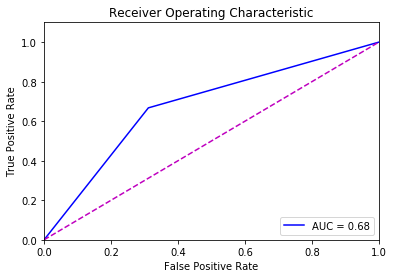

Precision score : 0.16
Recall score : 0.67
              precision    recall  f1-score   support

           0     0.9593    0.6886    0.8017     84806
           1     0.1584    0.6674    0.2560      7448

    accuracy                         0.6869     92254
   macro avg     0.5589    0.6780    0.5289     92254
weighted avg     0.8946    0.6869    0.7576     92254



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    6.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    1.3s finished


RandomForestClassifier :
Accuracy score: 0.689119170984456
ROC score:  0.6758578617785718


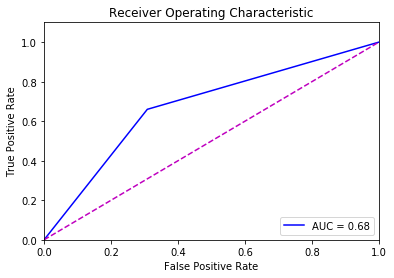

Precision score : 0.16
Recall score : 0.66
              precision    recall  f1-score   support

           0     0.9586    0.6917    0.8036     84806
           1     0.1583    0.6600    0.2553      7448

    accuracy                         0.6891     92254
   macro avg     0.5584    0.6759    0.5294     92254
weighted avg     0.8940    0.6891    0.7593     92254

GradientBoostingClassifier :
Accuracy score: 0.6672772996292844
ROC score:  0.6655087137907703


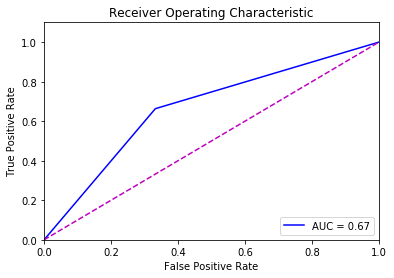

Precision score : 0.15
Recall score : 0.66
              precision    recall  f1-score   support

           0     0.9576    0.6676    0.7867     84806
           1     0.1491    0.6634    0.2435      7448

    accuracy                         0.6673     92254
   macro avg     0.5534    0.6655    0.5151     92254
weighted avg     0.8923    0.6673    0.7429     92254



In [103]:
classify(app_train_X_feature_selection_after_complete_processed_df, app_train_y_feature_selection_after_sampled_df, app_test_X_feature_selection_after_processed_df, app_test_y)

## Oversampling using SMOTE

In [104]:
fs = FeatureSelector(data = app_train_X, labels = app_train_y)

In [105]:
fs.identify_missing(missing_threshold=0.6)

17 features with greater than 0.60 missing values.



In [106]:
missing_features = fs.ops['missing']
missing_features

['OWN_CAR_AGE',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'FLOORSMIN_AVG',
 'LIVINGAPARTMENTS_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'FLOORSMIN_MODE',
 'LIVINGAPARTMENTS_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'FLOORSMIN_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'FONDKAPREMONT_MODE']

In [107]:
app_train_X_missing_removed = fs.remove(methods = ['missing'], keep_one_hot = False)

Data has not been one-hot encoded
Removed 17 features including one-hot features.


In [108]:
app_test_X_missing_removed = app_test_X.drop(missing_features, axis=1)

In [109]:
# One-Hot encoding of categorical variables

app_train_X_encoded = pd.get_dummies(app_train_X_missing_removed)
#app_test = pd.get_dummies(app_test)

print('Training Features shape: ', app_train_X_encoded.shape)

Training Features shape:  (215257, 226)


In [110]:
app_test_X_encoded = pd.get_dummies(app_test_X_missing_removed)

print('Training Features shape: ', app_test_X_encoded.shape)

Training Features shape:  (92254, 224)


In [111]:
# Align the training and testing data, keep only columns present in both dataframes
app_train_X_encoded, app_test_X_encoded = app_train_X_encoded.align(app_test_X_encoded, join = 'inner', axis = 1)

print('Training Features shape: ', app_train_X_encoded.shape)
print('Testing Features shape: ', app_test_X_encoded.shape)

Training Features shape:  (215257, 224)
Testing Features shape:  (92254, 224)


In [112]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy = 'most_frequent')

imp.fit(app_train_X_encoded)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='most_frequent', verbose=0)

In [113]:
app_train_X_encoded_filled = imp.transform(app_train_X_encoded)

app_test_X_encoded_filled = imp.transform(app_test_X_encoded)

In [114]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(app_train_X_encoded_filled)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [115]:
app_train_X_processed_scaled = scaler.transform(app_train_X_encoded_filled)

app_test_X_processed_scaled = scaler.transform(app_test_X_encoded_filled)

In [116]:
app_train_X_processed_scaled_df = pd.DataFrame(app_train_X_processed_scaled, columns = app_train_X_encoded.columns)

app_test_X_processed_scaled_df = pd.DataFrame(app_test_X_processed_scaled, columns = app_test_X_encoded.columns)

In [117]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)

app_train_X_processed_scaled_sampled_df, app_train_y_sampled_df = sm.fit_sample(app_train_X_processed_scaled_df, app_train_y)
print(app_train_X_processed_scaled_sampled_df.shape)
print(app_train_y_sampled_df.shape)

(395760, 224)
(395760,)


In [118]:
app_train_X_processed_scaled_sampled_df = pd.DataFrame(app_train_X_processed_scaled_sampled_df, columns = app_train_X_encoded.columns)

In [119]:
fs = FeatureSelector(data = app_train_X_processed_scaled_sampled_df, labels = app_train_y_sampled_df)

fs.identify_all(selection_params = {'missing_threshold': 0.6, 'correlation_threshold': 0.98, 
                                    'task': 'classification', 'eval_metric': 'auc', 
                                     'cumulative_importance': 0.99})

0 features with greater than 0.60 missing values.

0 features with a single unique value.

25 features with a correlation magnitude greater than 0.98.

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[801]	valid_0's auc: 0.979148
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[659]	valid_0's auc: 0.97869
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[573]	valid_0's auc: 0.979188
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[513]	valid_0's auc: 0.978555
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[677]	valid_0's auc: 0.979177
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[812]	valid_0's auc: 0.979006
Training until validation scores don't improve 

In [120]:
all_to_remove = fs.check_removal()

Total of 85 features identified for removal


In [121]:
app_train_X_complete_processed_df = fs.remove(methods = 'all', keep_one_hot=False)

['missing', 'single_unique', 'collinear', 'zero_importance', 'low_importance'] methods have been run

Removed 85 features including one-hot features.


In [122]:
app_train_X_complete_processed_df.shape

(395760, 139)

In [123]:
app_test_X_complete_processed_df = app_test_X_processed_scaled_df.drop(all_to_remove, axis=1)

c:\users\kartik\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression :
Accuracy score: 0.6930214408047347
ROC score:  0.666835345284048


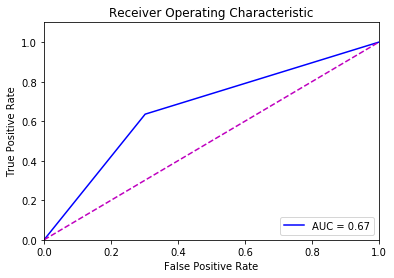

Precision score : 0.16
Recall score : 0.64
              precision    recall  f1-score   support

           0     0.9562    0.6981    0.8070     84806
           1     0.1560    0.6356    0.2506      7448

    accuracy                         0.6930     92254
   macro avg     0.5561    0.6668    0.5288     92254
weighted avg     0.8916    0.6930    0.7621     92254

GaussianNB :
Accuracy score: 0.39415093112493765
ROC score:  0.5737180642504142


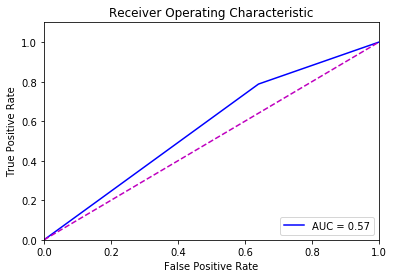

Precision score : 0.10
Recall score : 0.79
              precision    recall  f1-score   support

           0     0.9507    0.3596    0.5218     84806
           1     0.0975    0.7879    0.1735      7448

    accuracy                         0.3942     92254
   macro avg     0.5241    0.5737    0.3477     92254
weighted avg     0.8819    0.3942    0.4937     92254

DecisionTreeClassifier :
Accuracy score: 0.8357361198430421
ROC score:  0.5373583805717899


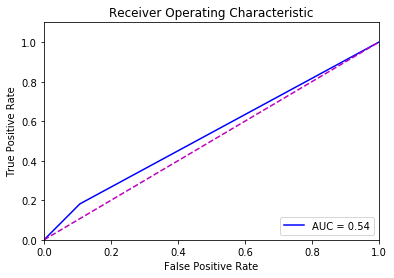

Precision score : 0.13
Recall score : 0.18
              precision    recall  f1-score   support

           0     0.9255    0.8932    0.9091     84806
           1     0.1299    0.1815    0.1514      7448

    accuracy                         0.8357     92254
   macro avg     0.5277    0.5374    0.5302     92254
weighted avg     0.8613    0.8357    0.8479     92254

BaggingClassifier :
Accuracy score: 0.9126216749409239
ROC score:  0.511450000383766


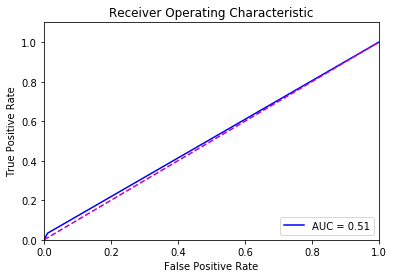

Precision score : 0.22
Recall score : 0.03
              precision    recall  f1-score   support

           0     0.9210    0.9899    0.9542     84806
           1     0.2226    0.0330    0.0575      7448

    accuracy                         0.9126     92254
   macro avg     0.5718    0.5115    0.5059     92254
weighted avg     0.8646    0.9126    0.8818     92254

AdaBoostClassifier :
Accuracy score: 0.8566132633815335
ROC score:  0.5470603289220689


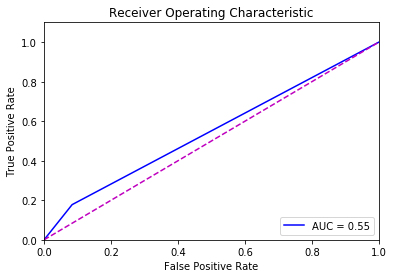

Precision score : 0.16
Recall score : 0.18
              precision    recall  f1-score   support

           0     0.9270    0.9162    0.9216     84806
           1     0.1572    0.1779    0.1669      7448

    accuracy                         0.8566     92254
   macro avg     0.5421    0.5471    0.5442     92254
weighted avg     0.8648    0.8566    0.8606     92254



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   44.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.7min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    2.2s finished


RandomForestClassifier :
Accuracy score: 0.9182366076267696
ROC score:  0.5021342956172188


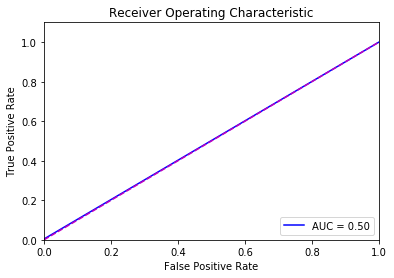

Precision score : 0.24
Recall score : 0.01
              precision    recall  f1-score   support

           0     0.9196    0.9984    0.9574     84806
           1     0.2404    0.0059    0.0115      7448

    accuracy                         0.9182     92254
   macro avg     0.5800    0.5021    0.4844     92254
weighted avg     0.8648    0.9182    0.8810     92254

GradientBoostingClassifier :
Accuracy score: 0.7445314024324149
ROC score:  0.5946083967393527


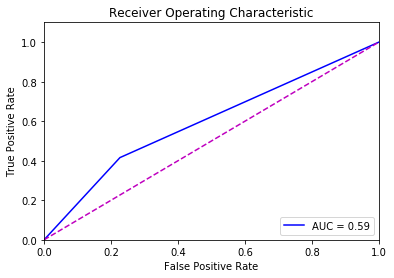

Precision score : 0.14
Recall score : 0.42
              precision    recall  f1-score   support

           0     0.9378    0.7734    0.8477     84806
           1     0.1388    0.4158    0.2081      7448

    accuracy                         0.7445     92254
   macro avg     0.5383    0.5946    0.5279     92254
weighted avg     0.8733    0.7445    0.7961     92254



In [124]:
classify(app_train_X_complete_processed_df, app_train_y_sampled_df, app_test_X_complete_processed_df, app_test_y)

## OverSampling using ADASYN

In [125]:
fs = FeatureSelector(data = app_train_X, labels = app_train_y)

In [126]:
fs.identify_missing(missing_threshold=0.6)

17 features with greater than 0.60 missing values.



In [127]:
missing_features = fs.ops['missing']
missing_features

['OWN_CAR_AGE',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'FLOORSMIN_AVG',
 'LIVINGAPARTMENTS_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'FLOORSMIN_MODE',
 'LIVINGAPARTMENTS_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'FLOORSMIN_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'FONDKAPREMONT_MODE']

In [128]:
app_train_X_missing_removed = fs.remove(methods = ['missing'], keep_one_hot = False)

Data has not been one-hot encoded
Removed 17 features including one-hot features.


In [129]:
app_test_X_missing_removed = app_test_X.drop(missing_features, axis=1)

In [130]:
# One-Hot encoding of categorical variables

app_train_X_encoded = pd.get_dummies(app_train_X_missing_removed)
#app_test = pd.get_dummies(app_test)

print('Training Features shape: ', app_train_X_encoded.shape)

Training Features shape:  (215257, 226)


In [131]:
app_test_X_encoded = pd.get_dummies(app_test_X_missing_removed)

print('Training Features shape: ', app_test_X_encoded.shape)

Training Features shape:  (92254, 224)


In [132]:
# Align the training and testing data, keep only columns present in both dataframes
app_train_X_encoded, app_test_X_encoded = app_train_X_encoded.align(app_test_X_encoded, join = 'inner', axis = 1)

print('Training Features shape: ', app_train_X_encoded.shape)
print('Testing Features shape: ', app_test_X_encoded.shape)

Training Features shape:  (215257, 224)
Testing Features shape:  (92254, 224)


In [133]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy = 'most_frequent')

imp.fit(app_train_X_encoded)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='most_frequent', verbose=0)

In [134]:
app_train_X_encoded_filled = imp.transform(app_train_X_encoded)

app_test_X_encoded_filled = imp.transform(app_test_X_encoded)

In [135]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(app_train_X_encoded_filled)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [136]:
app_train_X_processed_scaled = scaler.transform(app_train_X_encoded_filled)

app_test_X_processed_scaled = scaler.transform(app_test_X_encoded_filled)

In [137]:
app_train_X_processed_scaled_df = pd.DataFrame(app_train_X_processed_scaled, columns = app_train_X_encoded.columns)

app_test_X_processed_scaled_df = pd.DataFrame(app_test_X_processed_scaled, columns = app_test_X_encoded.columns)

In [138]:
from imblearn.over_sampling import ADASYN

sm = ADASYN(random_state=42)

app_train_X_processed_scaled_sampled_df, app_train_y_sampled_df = sm.fit_sample(app_train_X_processed_scaled_df, app_train_y)
print(app_train_X_processed_scaled_sampled_df.shape)
print(app_train_y_sampled_df.shape)

(397776, 224)
(397776,)


In [139]:
app_train_X_processed_scaled_sampled_df = pd.DataFrame(app_train_X_processed_scaled_sampled_df, columns = app_train_X_encoded.columns)

In [140]:
fs = FeatureSelector(data = app_train_X_processed_scaled_sampled_df, labels = app_train_y_sampled_df)

fs.identify_all(selection_params = {'missing_threshold': 0.6, 'correlation_threshold': 0.98, 
                                    'task': 'classification', 'eval_metric': 'auc', 
                                     'cumulative_importance': 0.99})

0 features with greater than 0.60 missing values.

0 features with a single unique value.

25 features with a correlation magnitude greater than 0.98.

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[714]	valid_0's auc: 0.978141
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[473]	valid_0's auc: 0.980081
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[585]	valid_0's auc: 0.979225
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[699]	valid_0's auc: 0.97972
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[526]	valid_0's auc: 0.97964
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[442]	valid_0's auc: 0.979183
Training until validation scores don't improve f

In [141]:
all_to_remove = fs.check_removal()

Total of 87 features identified for removal


In [142]:
app_train_X_complete_processed_df = fs.remove(methods = 'all', keep_one_hot=False)

['missing', 'single_unique', 'collinear', 'zero_importance', 'low_importance'] methods have been run

Removed 87 features including one-hot features.


In [143]:
app_train_X_complete_processed_df.shape

(397776, 137)

In [144]:
app_test_X_complete_processed_df = app_test_X_processed_scaled_df.drop(all_to_remove, axis=1)

c:\users\kartik\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression :
Accuracy score: 0.6856288074229844
ROC score:  0.665325091946127


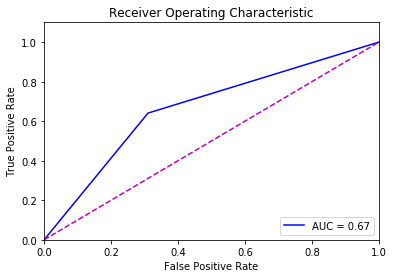

Precision score : 0.15
Recall score : 0.64
              precision    recall  f1-score   support

           0     0.9563    0.6895    0.8013     84806
           1     0.1535    0.6411    0.2477      7448

    accuracy                         0.6856     92254
   macro avg     0.5549    0.6653    0.5245     92254
weighted avg     0.8915    0.6856    0.7566     92254

GaussianNB :
Accuracy score: 0.34696598521473326
ROC score:  0.5649548272087127


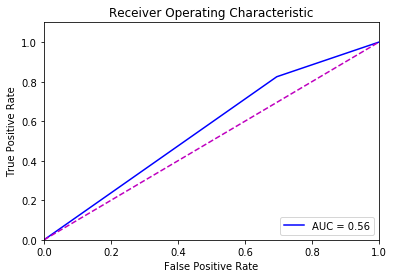

Precision score : 0.09
Recall score : 0.82
              precision    recall  f1-score   support

           0     0.9520    0.3050    0.4620     84806
           1     0.0944    0.8249    0.1694      7448

    accuracy                         0.3470     92254
   macro avg     0.5232    0.5650    0.3157     92254
weighted avg     0.8828    0.3470    0.4384     92254

DecisionTreeClassifier :
Accuracy score: 0.8333297201205367
ROC score:  0.5325590414318465


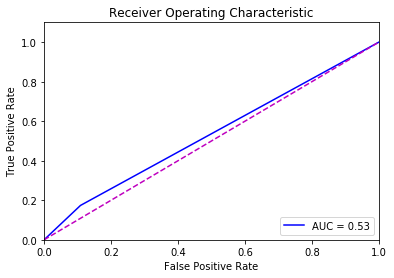

Precision score : 0.12
Recall score : 0.17
              precision    recall  f1-score   support

           0     0.9247    0.8912    0.9077     84806
           1     0.1231    0.1739    0.1442      7448

    accuracy                         0.8333     92254
   macro avg     0.5239    0.5326    0.5259     92254
weighted avg     0.8600    0.8333    0.8460     92254

BaggingClassifier :
Accuracy score: 0.9137056387798903
ROC score:  0.5109373277882244


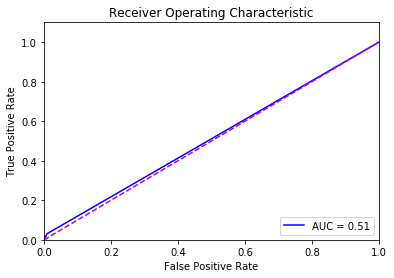

Precision score : 0.24
Recall score : 0.03
              precision    recall  f1-score   support

           0     0.9209    0.9913    0.9548     84806
           1     0.2353    0.0306    0.0542      7448

    accuracy                         0.9137     92254
   macro avg     0.5781    0.5109    0.5045     92254
weighted avg     0.8656    0.9137    0.8821     92254

AdaBoostClassifier :
Accuracy score: 0.8484184967589481
ROC score:  0.5508087622263316


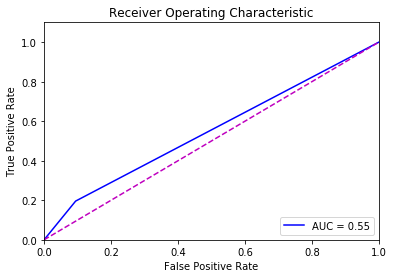

Precision score : 0.15
Recall score : 0.20
              precision    recall  f1-score   support

           0     0.9277    0.9057    0.9166     84806
           1     0.1543    0.1959    0.1726      7448

    accuracy                         0.8484     92254
   macro avg     0.5410    0.5508    0.5446     92254
weighted avg     0.8652    0.8484    0.8565     92254



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   44.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.7min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.9s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    2.2s finished


RandomForestClassifier :
Accuracy score: 0.9184967589481214
ROC score:  0.5017246682787198


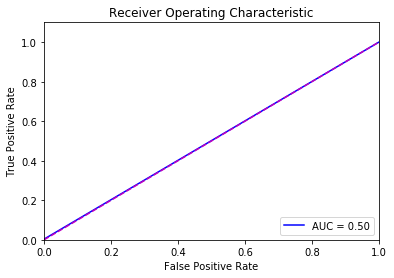

Precision score : 0.25
Recall score : 0.00
              precision    recall  f1-score   support

           0     0.9195    0.9988    0.9575     84806
           1     0.2482    0.0047    0.0092      7448

    accuracy                         0.9185     92254
   macro avg     0.5839    0.5017    0.4834     92254
weighted avg     0.8653    0.9185    0.8809     92254

GradientBoostingClassifier :
Accuracy score: 0.7405424155050188
ROC score:  0.5921325573983945


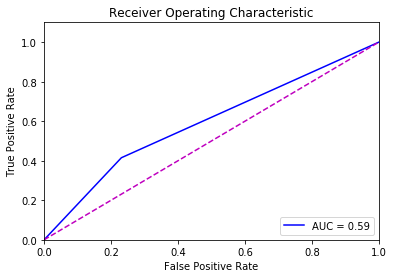

Precision score : 0.14
Recall score : 0.42
              precision    recall  f1-score   support

           0     0.9374    0.7691    0.8450     84806
           1     0.1364    0.4151    0.2053      7448

    accuracy                         0.7405     92254
   macro avg     0.5369    0.5921    0.5251     92254
weighted avg     0.8727    0.7405    0.7933     92254



In [145]:
classify(app_train_X_complete_processed_df, app_train_y_sampled_df, app_test_X_complete_processed_df, app_test_y)

## Taking the best of all world

**Looking for Duplicates**

In [188]:
print(application_train.shape)

train_no_dup = application_train.drop_duplicates(keep=False)
print(application_train.shape)

(307511, 122)
(307511, 122)


**Use of Stratified ShuffleSplit cross-validator to split the data in train/test sets**

In [189]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=3, test_size=0.15, random_state=42)

for train_index, test_index in split.split(train_no_dup, train_no_dup['TARGET']):
    app_train_set = train_no_dup.loc[train_index]
    app_test_set = train_no_dup.loc[test_index]
    
app_train_set.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
269877      412782       0         Cash loans           F            N   
228669      364861       0         Cash loans           M            N   
224874      360465       0         Cash loans           F            Y   
246953      385772       0         Cash loans           M            N   
39652       145906       0         Cash loans           M            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
269877               Y             2          360000.0    808650.0   
228669               Y             0           90000.0    481176.0   
224874               Y             0          180000.0    781695.0   
246953               Y             1          135000.0    668304.0   
39652                N             0          234000.0    654498.0   

        AMT_ANNUITY             ...              FLAG_DOCUMENT_18  \
269877      26217.0             ...                             0   
228669      26230.5             ...                             0   
224874      25213.5             ...                             0   
246953      28444.5             ...                             0   
39652       31486.5             ...                             0   

       FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
269877                0                0                0   
228669                0                0                0   
224874                0                0                0   
246953                0                0                0   
39652                 0                0                0   

       AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
269877                        0.0                       0.0   
228669                        0.0                       0.0   
224874                        NaN                       NaN   
246953                        0.0                       0.0   
39652                         0.0                       0.0   

        AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
269877                         0.0                        0.0   
228669                         0.0                        0.0   
224874                         NaN                        NaN   
246953                         0.0                        0.0   
39652                          0.0                        0.0   

        AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
269877                        0.0                         1.0  
228669                        1.0                         0.0  
224874                        NaN                         NaN  
246953                        1.0                         4.0  
39652                         0.0                         7.0  

[5 rows x 122 columns]

In [190]:
app_train_set['TARGET'].value_counts()

0    240283
1     21101
Name: TARGET, dtype: int64

In [191]:
draw_pie(app_train_set,'TARGET')

In [192]:
app_train_X = app_train_set.drop(['TARGET'] , axis =1)

app_train_y = app_train_set['TARGET']

app_test_X = app_test_set.drop(['TARGET'] , axis =1)

app_test_y = app_test_set['TARGET']

print (app_train_X.shape, app_train_y.shape)
print (app_test_X.shape, app_test_y.shape)

(261384, 121) (261384,)
(46127, 121) (46127,)


**Undersampling**

In [193]:
# For now not considered but will be used in analysis (Under sampling of Data)

app_train = app_train_X 

app_train['TARGET'] = app_train_y

count_class_0, count_class_1 = app_train.TARGET.value_counts()

df_class_0 = app_train[app_train['TARGET'] == 0]
df_class_1 = app_train[app_train['TARGET'] == 1]

After sampling:
1    21101
0    21101
Name: TARGET, dtype: int64


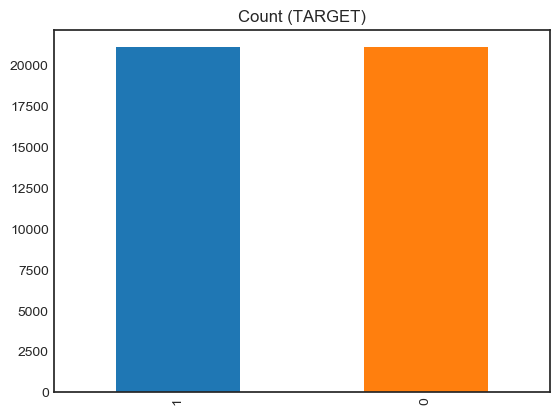

In [194]:
df_class_0_under = df_class_0.sample(count_class_1)
app_train_sampled = pd.concat([df_class_0_under, df_class_1], axis=0)

print('After sampling:')
print(app_train_sampled.TARGET.value_counts())

app_train_sampled.TARGET.value_counts().plot(kind='bar', title='Count (TARGET)');

In [195]:
app_train_X_sampled = app_train_sampled.drop(['TARGET'] , axis =1)

app_train_y_sampled = app_train_sampled['TARGET']

In [196]:
fs = FeatureSelector(data = app_train_X_sampled, labels = app_train_y_sampled)

In [197]:
fs.identify_missing(missing_threshold=0.6)

23 features with greater than 0.60 missing values.



In [198]:
missing_features = fs.ops['missing']
missing_features

['OWN_CAR_AGE',
 'BASEMENTAREA_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'BASEMENTAREA_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'BASEMENTAREA_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'FONDKAPREMONT_MODE']

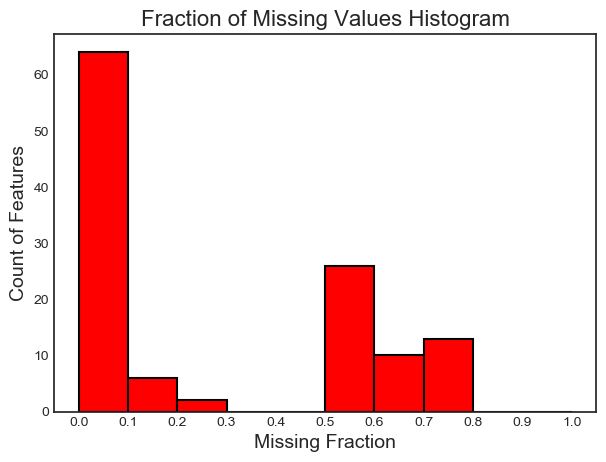

In [199]:
fs.plot_missing()

In [200]:
app_train_X_missing_removed = fs.remove(methods = ['missing'], keep_one_hot = False)

Data has not been one-hot encoded
Removed 23 features including one-hot features.


In [201]:
app_test_X_missing_removed = app_test_X.drop(missing_features, axis=1)

In [202]:
# One-Hot encoding of categorical variables

app_train_X_encoded = pd.get_dummies(app_train_X_missing_removed)

print('Training Features shape: ', app_train_X_encoded.shape)

Training Features shape:  (42202, 218)


In [203]:
app_test_X_encoded = pd.get_dummies(app_test_X_missing_removed)

print('Training Features shape: ', app_test_X_encoded.shape)

Training Features shape:  (46127, 216)


In [204]:
# Align the training and testing data, keep only columns present in both dataframes
app_train_X_encoded, app_test_X_encoded = app_train_X_encoded.align(app_test_X_encoded, join = 'inner', axis = 1)

print('Training Features shape: ', app_train_X_encoded.shape)
print('Testing Features shape: ', app_test_X_encoded.shape)

Training Features shape:  (42202, 216)
Testing Features shape:  (46127, 216)


In [205]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer(max_iter=10, random_state=42)

imp.fit(app_train_X_encoded)

IterativeImputer(add_indicator=False, estimator=None,
                 imputation_order='ascending', initial_strategy='mean',
                 max_iter=10, max_value=None, min_value=None,
                 missing_values=nan, n_nearest_features=None, random_state=42,
                 sample_posterior=False, tol=0.001, verbose=0)

In [206]:
app_train_X_encoded_filled = imp.transform(app_train_X_encoded)

app_test_X_encoded_filled = imp.transform(app_test_X_encoded)

In [207]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(app_train_X_encoded_filled)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [208]:
app_train_X_processed_scaled = scaler.transform(app_train_X_encoded_filled)

app_test_X_processed_scaled = scaler.transform(app_test_X_encoded_filled)

In [209]:
app_train_X_processed_scaled_df = pd.DataFrame(app_train_X_processed_scaled, columns = app_train_X_encoded.columns)

app_test_X_processed_scaled_df = pd.DataFrame(app_test_X_processed_scaled, columns = app_test_X_encoded.columns)

In [210]:
fs = FeatureSelector(data = app_train_X_processed_scaled_df, labels = app_train_y_sampled)

In [211]:
fs.identify_single_unique()

3 features with a single unique value.



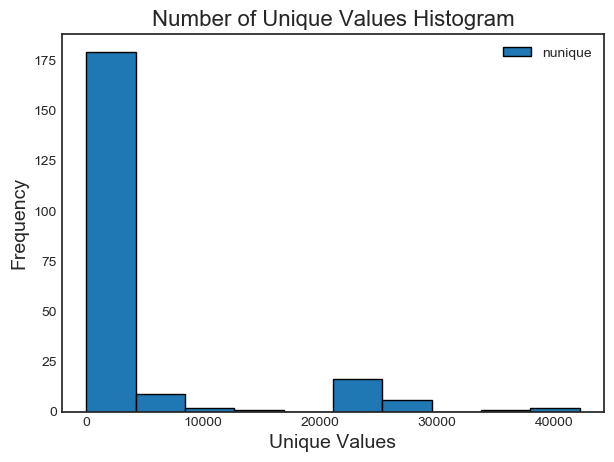

In [212]:
fs.plot_unique()

In [213]:
fs.unique_stats.sample(5)

nunique
ORGANIZATION_TYPE_Police                   2
FLAG_EMP_PHONE                             2
ORGANIZATION_TYPE_Services                 2
WEEKDAY_APPR_PROCESS_START_SATURDAY        2
NAME_INCOME_TYPE_Pensioner                 2

In [214]:
fs.identify_collinear(correlation_threshold=0.975)

19 features with a correlation magnitude greater than 0.97.



In [215]:
correlated_features = fs.ops['collinear']
correlated_features[:5]

['AMT_GOODS_PRICE',
 'FLAG_EMP_PHONE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE']

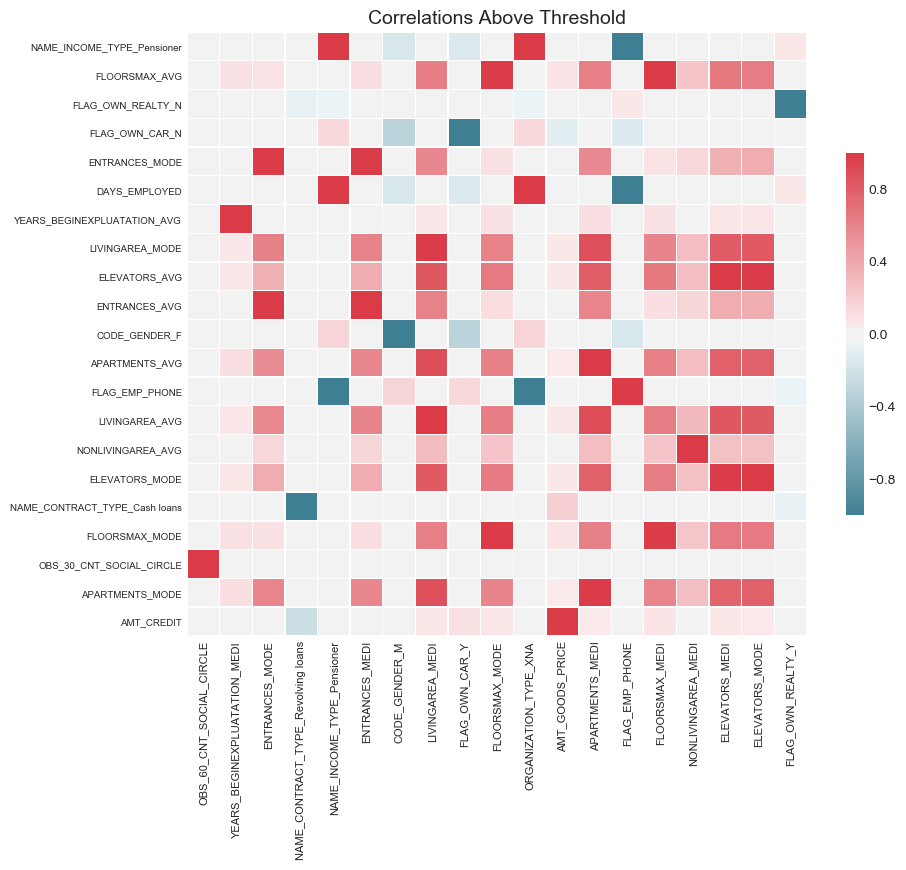

In [216]:
fs.plot_collinear()

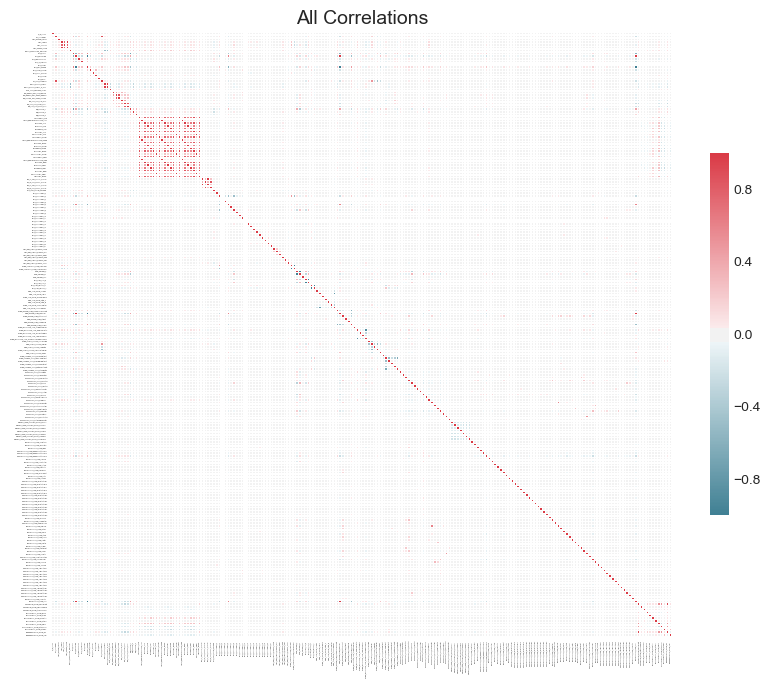

In [217]:
fs.plot_collinear(plot_all=True)

In [218]:
fs.identify_zero_importance(task = 'classification', eval_metric = 'auc', 
                            n_iterations = 10, early_stopping = True)

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[218]	valid_0's auc: 0.754864
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[183]	valid_0's auc: 0.761078
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[128]	valid_0's auc: 0.758981
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[221]	valid_0's auc: 0.757057
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[157]	valid_0's auc: 0.742214
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[160]	valid_0's auc: 0.75949
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[132]	valid_0's auc: 0.753117
Training until validation scores don't improve for 100 rounds.
Early st

In [219]:
one_hot_features = fs.one_hot_features
base_features = fs.base_features
print('There are %d original features' % len(base_features))
print('There are %d one-hot features' % len(one_hot_features))

There are 216 original features
There are 0 one-hot features


In [220]:
zero_importance_features = fs.ops['zero_importance']
zero_importance_features[10:15]

['NAME_INCOME_TYPE_Unemployed',
 'ORGANIZATION_TYPE_Religion',
 'NAME_CONTRACT_TYPE_Revolving loans',
 'ORGANIZATION_TYPE_Postal',
 'FLAG_DOCUMENT_12']

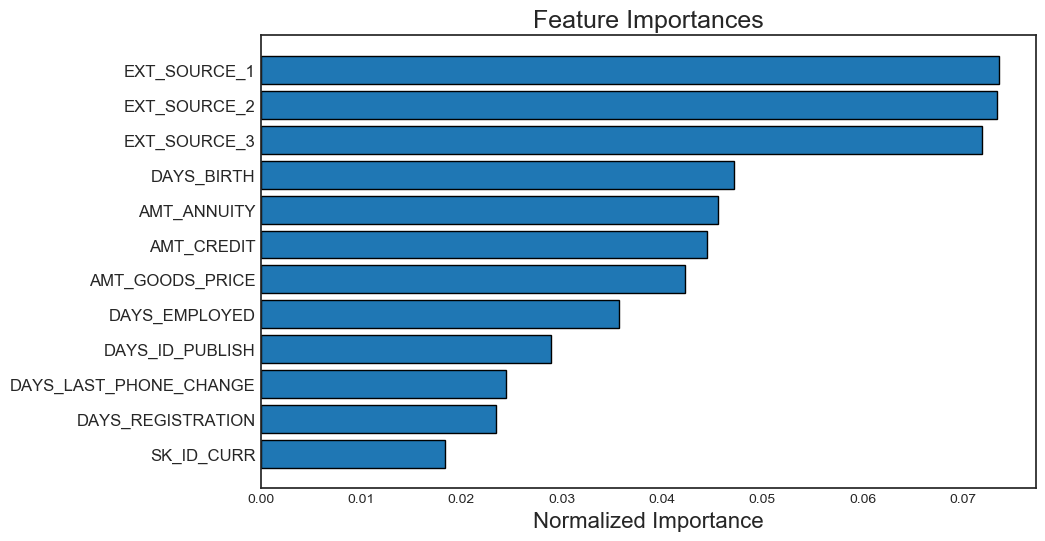

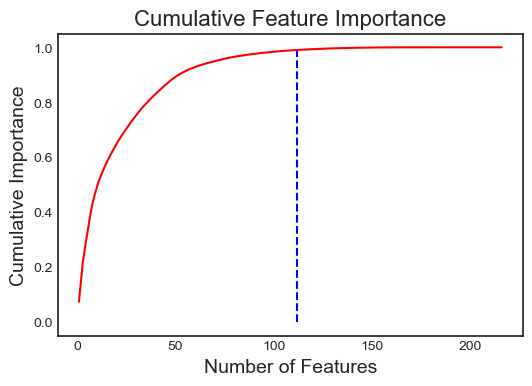

112 features required for 0.99 of cumulative importance


In [221]:
fs.plot_feature_importances(threshold = 0.99, plot_n = 12)

In [222]:
fs.feature_importances.head(10)

feature  importance  normalized_importance  \
0            EXT_SOURCE_1       370.1               0.073564   
1            EXT_SOURCE_2       369.3               0.073405   
2            EXT_SOURCE_3       361.7               0.071894   
3              DAYS_BIRTH       237.4               0.047187   
4             AMT_ANNUITY       229.5               0.045617   
5              AMT_CREDIT       223.9               0.044504   
6         AMT_GOODS_PRICE       212.8               0.042298   
7           DAYS_EMPLOYED       179.9               0.035758   
8         DAYS_ID_PUBLISH       145.8               0.028980   
9  DAYS_LAST_PHONE_CHANGE       123.2               0.024488   

   cumulative_importance  
0               0.073564  
1               0.146969  
2               0.218863  
3               0.266050  
4               0.311668  
5               0.356172  
6               0.398469  
7               0.434228  
8               0.463208  
9               0.487696

In [223]:
fs.identify_low_importance(cumulative_importance = 0.99)

111 features required for cumulative importance of 0.99 after one hot encoding.
105 features do not contribute to cumulative importance of 0.99.



In [224]:
low_importance_features = fs.ops['low_importance']
low_importance_features[:5]

['WALLSMATERIAL_MODE_Stone, brick',
 'FLAG_EMAIL',
 'NAME_FAMILY_STATUS_Widow',
 'FLAG_DOCUMENT_14',
 'NAME_FAMILY_STATUS_Separated']

In [225]:
all_to_remove = fs.check_removal()

Total of 118 features identified for removal


In [226]:
app_train_X_complete_processed_df = fs.remove(methods = 'all', keep_one_hot=False)

['single_unique', 'collinear', 'zero_importance', 'low_importance'] methods have been run

Removed 118 features including one-hot features.


In [227]:
app_train_X_complete_processed_df.shape

(42202, 98)

In [228]:
app_test_X_complete_processed_df = app_test_X_processed_scaled_df.drop(all_to_remove, axis=1)

c:\users\kartik\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression :
Accuracy score: 0.6887072647256488
ROC score:  0.6829821778362002


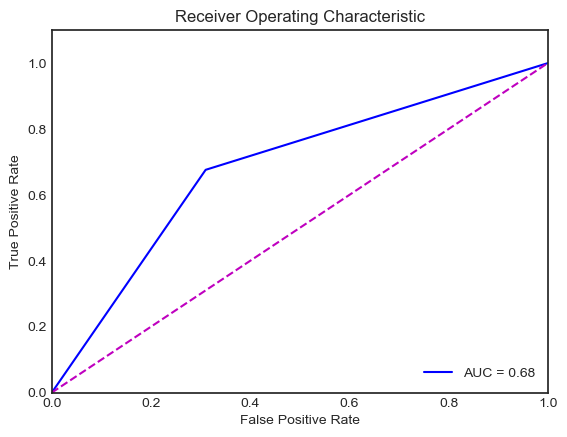

Precision score : 0.16
Recall score : 0.68
              precision    recall  f1-score   support

           0     0.9604    0.6898    0.8029     42403
           1     0.1607    0.6762    0.2597      3724

    accuracy                         0.6887     46127
   macro avg     0.5605    0.6830    0.5313     46127
weighted avg     0.8958    0.6887    0.7591     46127

GaussianNB :
Accuracy score: 0.6116374357751425
ROC score:  0.6236718628905555


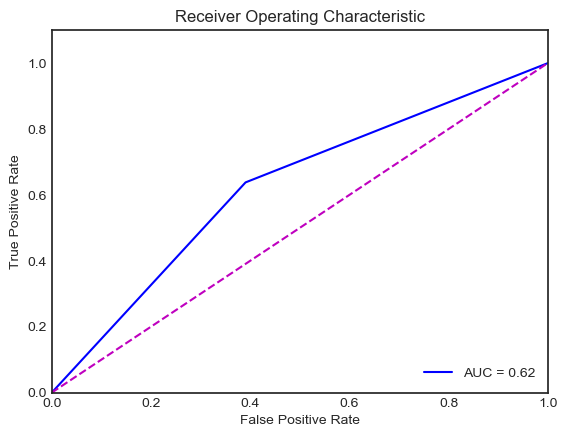

Precision score : 0.13
Recall score : 0.64
              precision    recall  f1-score   support

           0     0.9504    0.6093    0.7426     42403
           1     0.1254    0.6380    0.2097      3724

    accuracy                         0.6116     46127
   macro avg     0.5379    0.6237    0.4761     46127
weighted avg     0.8838    0.6116    0.6995     46127

DecisionTreeClassifier :
Accuracy score: 0.5865328332646823
ROC score:  0.5909114409426223


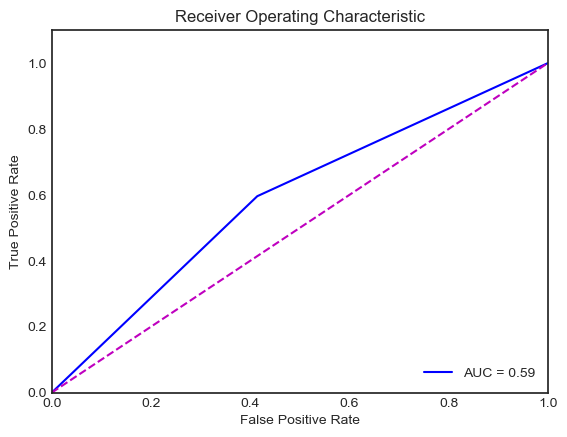

Precision score : 0.11
Recall score : 0.60
              precision    recall  f1-score   support

           0     0.9429    0.5857    0.7226     42403
           1     0.1122    0.5961    0.1888      3724

    accuracy                         0.5865     46127
   macro avg     0.5275    0.5909    0.4557     46127
weighted avg     0.8758    0.5865    0.6795     46127

BaggingClassifier :
Accuracy score: 0.7042296268996466
ROC score:  0.6386392802801354


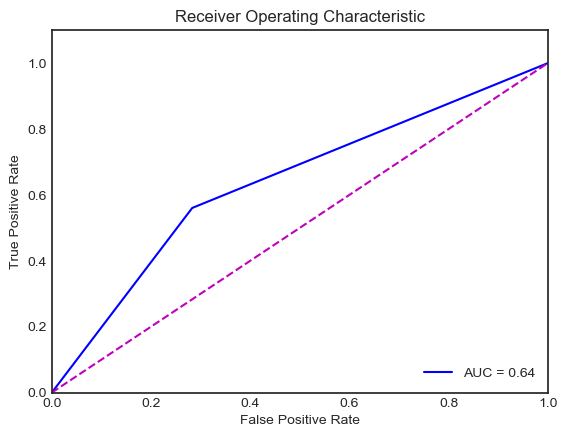

Precision score : 0.15
Recall score : 0.56
              precision    recall  f1-score   support

           0     0.9489    0.7169    0.8167     42403
           1     0.1481    0.5604    0.2343      3724

    accuracy                         0.7042     46127
   macro avg     0.5485    0.6386    0.5255     46127
weighted avg     0.8842    0.7042    0.7697     46127

AdaBoostClassifier :
Accuracy score: 0.6919591562425478
ROC score:  0.6820565231170311


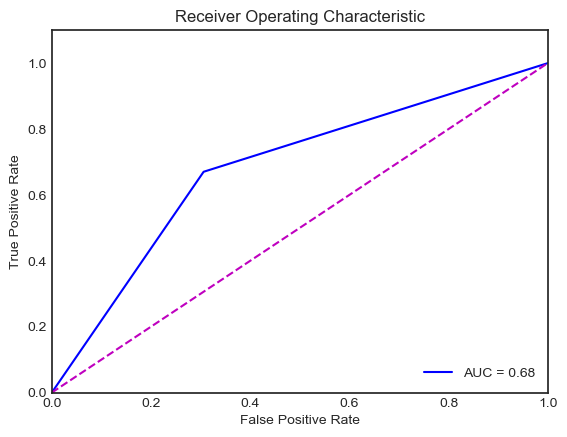

Precision score : 0.16
Recall score : 0.67
              precision    recall  f1-score   support

           0     0.9599    0.6939    0.8055     42403
           1     0.1613    0.6702    0.2600      3724

    accuracy                         0.6920     46127
   macro avg     0.5606    0.6821    0.5327     46127
weighted avg     0.8955    0.6920    0.7615     46127



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    9.6s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.6s finished


RandomForestClassifier :
Accuracy score: 0.688924057493442
ROC score:  0.673179812328602


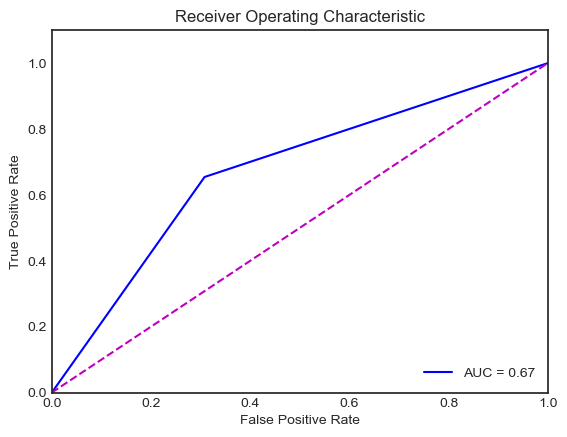

Precision score : 0.16
Recall score : 0.65
              precision    recall  f1-score   support

           0     0.9580    0.6920    0.8035     42403
           1     0.1572    0.6544    0.2536      3724

    accuracy                         0.6889     46127
   macro avg     0.5576    0.6732    0.5285     46127
weighted avg     0.8933    0.6889    0.7591     46127

GradientBoostingClassifier :
Accuracy score: 0.6634292280009539
ROC score:  0.6662938079209432


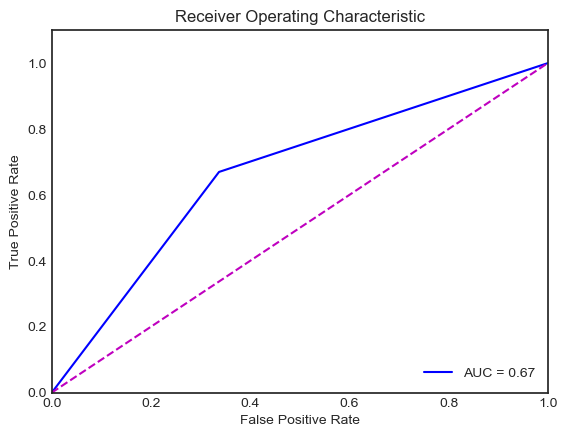

Precision score : 0.15
Recall score : 0.67
              precision    recall  f1-score   support

           0     0.9581    0.6629    0.7836     42403
           1     0.1485    0.6697    0.2432      3724

    accuracy                         0.6634     46127
   macro avg     0.5533    0.6663    0.5134     46127
weighted avg     0.8927    0.6634    0.7400     46127



In [229]:
classify(app_train_X_complete_processed_df, app_train_y_sampled, app_test_X_complete_processed_df, app_test_y)

Accuracy score: 0.6881652828061656
ROC score:  0.6853817848700641


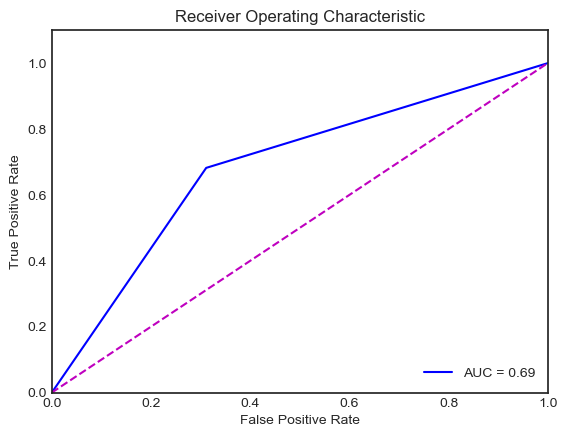

Precision score : 0.16
Recall score : 0.68
              precision    recall  f1-score   support

           0     0.9610    0.6887    0.8024     42403
           1     0.1614    0.6821    0.2610      3724

    accuracy                         0.6882     46127
   macro avg     0.5612    0.6854    0.5317     46127
weighted avg     0.8965    0.6882    0.7587     46127



In [231]:
from xgboost import XGBClassifier

clf_xgb = XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, 
                  n_estimators=100, max_depth=3)

clf_xgb.fit(app_train_X_complete_processed_df, app_train_y_sampled)
y_pred= clf_xgb.predict(app_test_X_complete_processed_df)
        
print("Accuracy score:", accuracy_score(app_test_y, y_pred)) 
get_model_roc(app_test_y, y_pred);
get_model_prec_recall(app_test_y, y_pred);

In [232]:
import lightgbm as lgb

d_train = lgb.Dataset(app_train_X_complete_processed_df, label=app_train_y_sampled)
params = {}
params['learning_rate'] = 0.003
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 10

clf = lgb.train(params, d_train, 100)

In [236]:
#Prediction
y_pred=clf.predict(app_test_X_complete_processed_df)
#convert into binary values
for i in range(len(y_pred)):
    if y_pred[i]>=.5:       # setting threshold to .5
       y_pred[i]=1
    else:  
       y_pred[i]=0

Accuracy score: 0.6737052051943547
ROC score:  0.6750673230490324


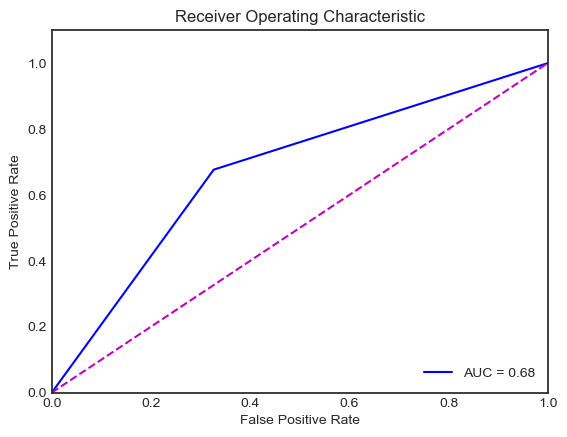

Precision score : 0.15
Recall score : 0.68
              precision    recall  f1-score   support

           0     0.9595    0.6734    0.7914     42403
           1     0.1540    0.6767    0.2509      3724

    accuracy                         0.6737     46127
   macro avg     0.5568    0.6751    0.5211     46127
weighted avg     0.8945    0.6737    0.7478     46127



In [237]:
print("Accuracy score:", accuracy_score(app_test_y, y_pred)) 
get_model_roc(app_test_y, y_pred);
get_model_prec_recall(app_test_y, y_pred);

## Hyperparameter tuning using grid search (for logistic regression)

In [238]:
from sklearn.model_selection import GridSearchCV

In [239]:
# Create logistic regression
logistic = LogisticRegression()

In [240]:
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [241]:
# Create grid search using 5-fold cross validation
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)

In [242]:
# Fit grid search
logistic_best_model = clf.fit(app_train_X_complete_processed_df, app_train_y_sampled)

c:\users\kartik\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

c:\users\kartik\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

c:\users\kartik\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

c:\users\kartik\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

c:\users\kartik\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: Futur

c:\users\kartik\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

c:\users\kartik\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

c:\users\kartik\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

c:\users\kartik\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

c:\users\kartik\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: Futur

c:\users\kartik\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

c:\users\kartik\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

c:\users\kartik\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

c:\users\kartik\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

c:\users\kartik\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: Futur

In [243]:
# View best hyperparameters
print('Best Penalty:', logistic_best_model.best_estimator_.get_params()['penalty'])
print('Best C:', logistic_best_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 21.544346900318832


Accuracy score: 0.6896177943503805
ROC score:  0.6839673162679019


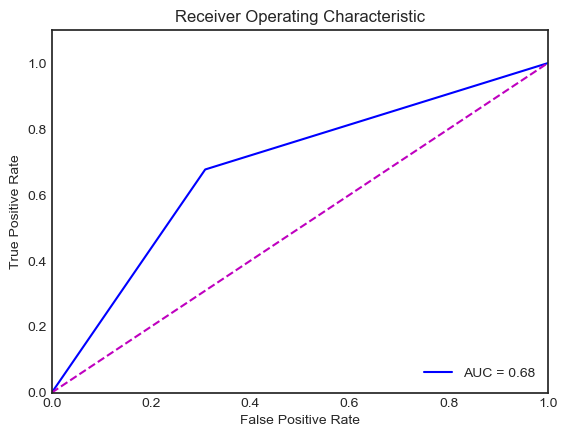

Precision score : 0.16
Recall score : 0.68
              precision    recall  f1-score   support

           0     0.9606    0.6907    0.8036     42403
           1     0.1613    0.6772    0.2605      3724

    accuracy                         0.6896     46127
   macro avg     0.5609    0.6840    0.5321     46127
weighted avg     0.8960    0.6896    0.7597     46127



In [244]:
y_pred= clf.predict(app_test_X_complete_processed_df)
print("Accuracy score:", accuracy_score(app_test_y, y_pred))

get_model_roc(app_test_y, y_pred);
get_model_prec_recall(app_test_y, y_pred);

## Using Stacking (LogisticRegression, BaggingClassifier, AdaBoostClassifier & RandomForestClassifier)

In [253]:
from vecstack import stacking

In [281]:
models = [
    LogisticRegression(),
    BaggingClassifier(DecisionTreeClassifier(random_state=42)),
    AdaBoostClassifier(random_state=42),
    RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)
]

In [282]:
S_train, S_test = stacking(models,                   
                           app_train_X_complete_processed_df, app_train_y_sampled, app_test_X_complete_processed_df,   
                           regression=False, 
     
                           mode='oof_pred_bag', 
       
                           needs_proba=False,
         
                           save_dir=None, 
            
                           metric=accuracy_score, 
    
                           n_folds=4, 
                 
                           stratified=True,
            
                           shuffle=True,  
            
                           random_state=0,    
         
                           verbose=2)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [4]

model  0:     [LogisticRegression]


c:\users\kartik\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



    fold  0:  [0.68138741]


c:\users\kartik\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



    fold  1:  [0.69308057]


c:\users\kartik\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



    fold  2:  [0.68369668]


c:\users\kartik\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



    fold  3:  [0.68568720]
    ----
    MEAN:     [0.68596297] + [0.00438201]
    FULL:     [0.68596275]

model  1:     [BaggingClassifier]
    fold  0:  [0.63722517]
    fold  1:  [0.64796209]
    fold  2:  [0.64255924]
    fold  3:  [0.64426540]
    ----
    MEAN:     [0.64300298] + [0.00386544]
    FULL:     [0.64300270]

model  2:     [AdaBoostClassifier]
    fold  0:  [0.67892343]
    fold  1:  [0.68767773]
    fold  2:  [0.68369668]
    fold  3:  [0.67971564]
    ----
    MEAN:     [0.68250337] + [0.00349233]
    FULL:     [0.68250320]

model  3:     [RandomForestClassifier]


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


    fold  0:  [0.67418499]


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


    fold  1:  [0.68341232]


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.2s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.5s finished


    fold  2:  [0.67402844]


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    5.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.5s finished


    fold  3:  [0.67962085]
    ----
    MEAN:     [0.67781165] + [0.00394037]
    FULL:     [0.67781148]



Accuracy score: 0.7091291434517745
ROC score:  0.6864965804432954


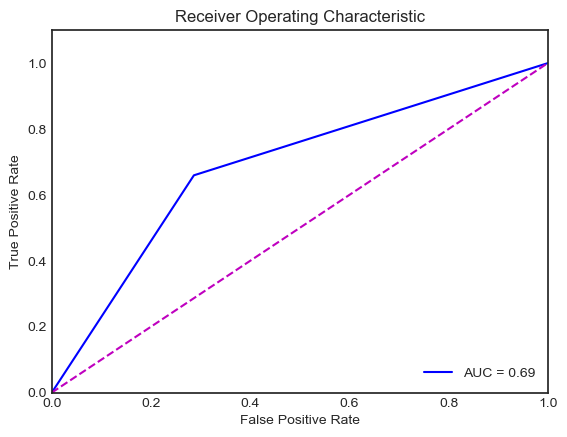

Precision score : 0.17
Recall score : 0.66
              precision    recall  f1-score   support

           0     0.9598    0.7135    0.8185     42403
           1     0.1682    0.6595    0.2680      3724

    accuracy                         0.7091     46127
   macro avg     0.5640    0.6865    0.5432     46127
weighted avg     0.8959    0.7091    0.7741     46127



In [283]:
model = XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1, 
                      n_estimators=100, max_depth=3)
    
model = model.fit(S_train, app_train_y_sampled)
y_pred = model.predict(S_test)
        
print("Accuracy score:", accuracy_score(app_test_y, y_pred)) 
get_model_roc(app_test_y, y_pred);
get_model_prec_recall(app_test_y, y_pred);

## Hyperparameter tuning using grid search (for Bagging Classifier)

In [287]:
param_grid = {
    'base_estimator__max_depth' : [1, 2, 3, 4, 5],
    'max_samples' : [0.05, 0.1, 0.2, 0.5]
}

clf = GridSearchCV(BaggingClassifier(DecisionTreeClassifier()),
                   param_grid, verbose=0)
clf.fit(app_train_X_complete_processed_df, app_train_y_sampled)

c:\users\kartik\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning:

The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.



GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                                               criterion='gini',
                                                                               max_depth=None,
                                                                               max_features=None,
                                                                               max_leaf_nodes=None,
                                                                               min_impurity_decrease=0.0,
                                                                               min_impurity_split=None,
                                                                               min_samples_leaf=1,
                                                                               min_samples_split=2,
                                              

Accuracy score: 0.6872547531814339
ROC score:  0.6701898232734024


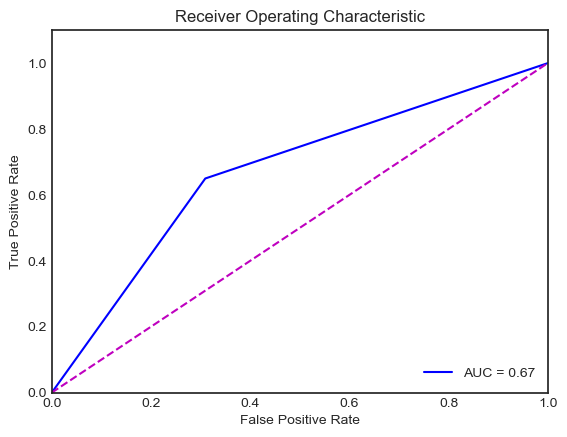

Precision score : 0.16
Recall score : 0.65
              precision    recall  f1-score   support

           0     0.9574    0.6905    0.8024     42403
           1     0.1557    0.6498    0.2512      3724

    accuracy                         0.6873     46127
   macro avg     0.5565    0.6702    0.5268     46127
weighted avg     0.8926    0.6873    0.7579     46127



In [288]:
y_pred= clf.predict(app_test_X_complete_processed_df)
print("Accuracy score:", accuracy_score(app_test_y, y_pred))

get_model_roc(app_test_y, y_pred);
get_model_prec_recall(app_test_y, y_pred);